# Week 15 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 15

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    """
    This function creates a column for per week average stats.
    
    Parameters:
        dataframe: the dataframe you want to add to
        column1: the statistic you want to average over the number of games
        column2: the games column to average with
        
    Returns:
        new column with averaged stats across the number of games an individual has played
    
    """
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def print_metric(dataframe, metric, player_inx):
    """
    This function prints a stat for a player and the average for the stat across all the players listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        player_idx: the index number for the player in the dataframe
        
    Returns:
        printed stats for the average and a given player for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [8]:
def print_metric_team(dataframe, metric, team_inx):
    """
    This function prints a stat for a team and the average for the stat across all teams listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        team_idx: the index number for the team in the dataframe
        
    Returns:
        printed stats for the average and a team for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [9]:
def bar_plot(x, y, metric, x_label, y_label):
    """
    This function plots a stat on a bar graph for a group of players or teams determined in the x & y.
    
    Parameters:
        x: list of players/teams
        y: values of a given metric
        metric: the stat in question
        x_label: label for the x axis
        y_label: label for the y axis
        
    Returns:
        bar graph
    """
    
    plt.figure(figsize = (8, 4))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [10]:
def scale_data(dataframe, column_list):
    """
    This function scales data so they can be easily compared.
    
    Parameters:
        dataframe: dataframe you want to scale
        column_list: list of columns that will be passed through and scaled
        
    Returns:
        scaled columns in the dataframe
    """
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [11]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [12]:
print(offense.shape)
offense.head()

(608, 44)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15
0,Dalvin Cook*,MIN,RB,25,13,13,0,0,0,0,0,297,1484,5.00,15,52,42,349,11.10,1,4,3,16,3,0,300.30,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Derrick Henry *,TEN,RB,26,14,14,0,0,0,0,0,321,1679,7.30,15,31,19,114,6.00,0,1,1,15,1,0,278.80,2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Alvin Kamara*,NOR,RB,25,14,9,0,0,0,0,0,165,777,11.10,10,102,80,739,11.40,5,1,0,15,0,0,281.60,3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Tyreek Hill*,KAN,WR,26,14,14,0,0,0,0,0,13,123,13.60,2,129,83,1211,19.90,15,1,0,17,0,0,276.90,1,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Kyler Murray *,ARI,QB,23,14,14,336,497,3637,26,11,123,741,6.20,11,0,0,0,0.00,0,9,4,11,0,0,370.60,1,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
print(defense.shape)
defense.head()

(32, 39)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15
0,Miami Dolphins,14,257,873,5.70,5013,363,1680,4.60,14,473,6.50,298,12.20,3333,16,39,22,56.40,26,16,10,37,135.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,14.00,10.00,9.00
1,Pittsburgh Steelers,14,264,867,4.80,4170,355,1464,4.10,9,465,5.30,260,11.60,2706,20,39,21,53.80,25,17,8,47,135.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00,2.00
2,Los Angeles Rams,14,269,879,4.60,4005,346,1317,3.80,11,489,5.00,308,9.70,2688,15,41,24,58.50,21,13,8,44,125.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00,2.00
3,Baltimore Ravens,14,287,918,5.20,4812,351,1539,4.40,12,534,5.80,350,10.00,3273,21,41,27,65.90,20,8,12,33,120.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,4.00,0.00,10.00
4,Washington Football Team,14,295,872,5.00,4377,364,1574,4.30,11,468,5.50,298,10.30,2803,20,37,19,51.40,18,13,5,40,108.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,15.00,3.00,23.00,3.00


In [14]:
defense['Ttl_Turnovers'] = defense['Interceptions'] + defense['Fumbles']
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Rushing_TDs', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
defense['Ttl_TDs_pG'] = defense['Rushing_TDs_pG'] + defense['Passing_TDs_pG']
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Fumbles', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [15]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
0,Miami Dolphins,14,257,873,5.70,5013,363,1680,4.60,14,473,6.50,298,12.20,3333,16,39,22,56.40,26,16,10,37,135.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,14.00,10.00,9.00,18.36,358.07,25.93,120.00,1.00,33.79,21.29,0.63,238.07,1.14,2.14,1.86,0.71,2.64,9.64
1,Pittsburgh Steelers,14,264,867,4.80,4170,355,1464,4.10,9,465,5.30,260,11.60,2706,20,39,21,53.80,25,17,8,47,135.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00,2.00,18.86,297.86,25.36,104.57,0.64,33.21,18.57,0.56,193.29,1.43,2.07,1.79,0.57,3.36,9.64
2,Los Angeles Rams,14,269,879,4.60,4005,346,1317,3.80,11,489,5.00,308,9.70,2688,15,41,24,58.50,21,13,8,44,125.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00,2.00,19.21,286.07,24.71,94.07,0.79,34.93,22.00,0.63,192.00,1.07,1.86,1.50,0.57,3.14,8.93
3,Baltimore Ravens,14,287,918,5.20,4812,351,1539,4.40,12,534,5.80,350,10.00,3273,21,41,27,65.90,20,8,12,33,120.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,4.00,0.00,10.00,20.50,343.71,25.07,109.93,0.86,38.14,25.00,0.66,233.79,1.50,2.36,1.43,0.86,2.36,8.57
4,Washington Football Team,14,295,872,5.00,4377,364,1574,4.30,11,468,5.50,298,10.30,2803,20,37,19,51.40,18,13,5,40,108.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,15.00,3.00,23.00,3.00,21.07,312.64,26.00,112.43,0.79,33.43,21.29,0.64,200.21,1.43,2.21,1.29,0.36,2.86,7.71


In [20]:
offense[offense['Player'] == "J.D. McKissic"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15
121,J.D. McKissic,WAS,RB,27,14,6,0,0,0,0,0,79,350,8.30,1,92,67,482,8.90,1,3,1,2,0,0,126.70,35,,93.20,0.10,5.30,5.20,2.60,4.90,8.40,5.10,0.00,8.20,10.90,6.90,2.70,7.80,8.60,16.70


In [21]:
taken_wrt = ['Davante Adams', 'Brandon Aiyuk', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', 
             "Le'Veon Bell", 'A.J. Brown', 'John Brown', 'DJ Chark', 'Nick Chubb', 
             'James Conner', 'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs',
             'J.K. Dobbins', 'Kenyan Drake', 'Eric Ebron', 'Chase Edmonds', 'Clyde Edwards-Helaire',
             'Austin Ekeler', 'Ezekiel Elliott', 'Evan Engram',  'Zach Ertz', 'Mike Evans', 'Noah Fant',
             'Leonard Fournette', 'Will Fuller', 'Mike Gesicki', 
             'Antonio Gibson', 'Kenny Golladay', 'Melvin Gordon', 
             'Todd Gurley', 'Damien Harris', 'Hunter Henry', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Jordan Howard', 'Kareem Hunt', 'Josh Jacobs', 'Justin Jefferson', 
             'David Johnson', 'Diontae Johnson', 'Aaron Jones', 'Ronald Jones II', 'Marvin Jones', 'Alvin Kamara', 
             'Travis Kelce', 'George Kittle', 'Cooper Kupp', 'Phillip Lindsay', 'Tyler Lockett', 
             'Christian McCaffrey', 'J.D. McKissic', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon',
             'David Montgomery', 'D.J. Moore', 'Zack Moss', 'DeVante Parker', 'Tony Pollard',
             'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Curtis Samuel', 'Miles Sanders', 
             'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 'Adam Thielen', 'Michael Thomas', 
             'Robert Tonyan', 'Darren Waller', 'Robert Woods']


In [22]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 
             'Deshaun Watson', 'Russell Wilson']

In [23]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', "Ka'imi Fairbairn",  
           'Younghoe Koo', 'Wil Lutz', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [65]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Chris Carson', 'Brandin Cooks',
              'Corey Davis *', 'Rob Gronkowski', 'Derrick Henry *', 'Nyheim Hines', 'DeAndre Hopkins',
              'Julio Jones', "D'Andre Swift"]


## QB Analysis

In [25]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15
4,Kyler Murray *,ARI,QB,23,14,14,336,497,3637,26,11,123,741,6.20,11,0,0,0,0.00,0,9,4,11,0,0,370.60,1,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Patrick Mahomes *,KAN,QB,25,14,14,366,544,4462,36,5,59,287,12.60,2,1,0,0,0.00,0,5,2,2,0,3,360.20,2,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Josh Allen *,BUF,QB,24,14,14,351,511,4000,30,9,96,383,12.90,8,1,1,12,12.00,1,9,6,9,0,0,353.00,3,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,Aaron Rodgers *,GNB,QB,37,14,14,332,477,3828,40,4,34,126,10.10,3,1,1,-6,-6.00,0,3,2,3,0,0,335.60,4,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11,Russell Wilson *,SEA,QB,32,14,14,344,490,3806,37,13,75,475,9.30,1,0,0,0,0.00,0,7,4,1,0,1,334.70,5,12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
quarterbacks['Ttl_Turnovers_pG'] = quarterbacks['Interceptions_pG'] + quarterbacks['LostFumbles_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [27]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
4,Kyler Murray *,ARI,QB,23,14,14,336,497,3637,26,11,123,741,6.20,11,0,0,0,0.00,0,9,4,11,0,0,370.60,1,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,35.50,0.68,259.79,1.86,7.32,0.79,0.29,1.07,52.93,0.00
6,Patrick Mahomes *,KAN,QB,25,14,14,366,544,4462,36,5,59,287,12.60,2,1,0,0,0.00,0,5,2,2,0,3,360.20,2,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.14,38.86,0.67,318.71,2.57,8.20,0.36,0.14,0.50,20.50,0.00
7,Josh Allen *,BUF,QB,24,14,14,351,511,4000,30,9,96,383,12.90,8,1,1,12,12.00,1,9,6,9,0,0,353.00,3,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.07,36.50,0.69,285.71,2.14,7.83,0.64,0.43,1.07,27.36,0.00
10,Aaron Rodgers *,GNB,QB,37,14,14,332,477,3828,40,4,34,126,10.10,3,1,1,-6,-6.00,0,3,2,3,0,0,335.60,4,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.71,34.07,0.70,273.43,2.86,8.03,0.29,0.14,0.43,9.00,0.00
11,Russell Wilson *,SEA,QB,32,14,14,344,490,3806,37,13,75,475,9.30,1,0,0,0,0.00,0,7,4,1,0,1,334.70,5,12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.57,35.00,0.70,271.86,2.64,7.77,0.93,0.29,1.21,33.93,0.00


In [28]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
count,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,72.00,76.00,76.00,72.00,76.00,76.00,76.00,76.00,76.00
mean,28.58,7.47,5.93,135.39,206.61,1490.92,9.88,4.47,24.43,106.75,6.41,1.46,0.32,0.21,1.49,0.71,0.04,3.03,1.37,1.50,0.05,0.51,113.05,85.63,6.09,6.45,6.05,6.13,5.25,5.54,5.64,5.14,5.68,4.78,4.91,5.00,6.19,5.92,6.96,14.14,22.05,0.62,153.82,0.93,6.43,0.52,0.15,0.67,11.34,9.30
std,5.09,4.91,5.74,132.62,198.07,1491.52,11.48,4.31,29.70,167.60,4.16,2.39,1.19,0.75,8.88,3.28,0.20,3.27,1.76,2.46,0.28,0.97,117.88,98.89,8.92,10.22,8.81,9.76,8.66,9.30,10.19,7.88,9.16,8.09,8.21,7.63,9.71,9.31,10.24,9.50,14.28,0.14,106.19,0.82,1.68,0.43,0.20,0.51,15.50,7.91
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00,0.00
25%,24.75,3.00,0.00,13.25,21.50,120.00,0.00,0.00,5.00,3.00,3.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.50,2.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.94,6.73,0.59,45.75,0.00,5.99,0.00,0.00,0.12,0.67,1.64
50%,27.00,7.00,4.50,80.00,126.50,892.00,4.50,3.50,11.50,23.50,6.85,0.00,0.00,0.00,0.00,0.00,0.00,1.50,1.00,0.00,0.00,0.00,68.20,31.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.88,27.15,0.64,179.68,1.00,6.86,0.61,0.07,0.71,7.33,9.86
75%,32.00,13.00,13.00,253.25,404.50,2637.00,17.00,8.00,33.25,144.25,9.62,2.00,0.00,0.00,0.00,0.00,0.00,5.00,2.00,2.00,0.00,1.00,223.60,156.97,13.22,12.23,12.62,11.87,7.98,11.10,6.82,11.00,10.95,7.58,7.38,9.10,12.90,13.53,14.70,22.41,34.16,0.68,244.60,1.58,7.49,0.79,0.26,1.00,17.44,16.60
max,43.00,14.00,14.00,366.00,559.00,4462.00,40.00,15.00,135.00,828.00,16.80,11.00,10.00,6.00,74.00,16.00,1.00,11.00,8.00,11.00,2.00,5.00,370.60,303.60,27.50,39.80,29.50,38.30,30.00,31.60,38.50,23.40,30.20,31.80,27.70,26.20,32.70,34.90,37.80,30.20,44.40,1.00,371.20,2.86,9.00,2.00,1.00,2.00,88.00,27.72


In [36]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers *', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
10,Aaron Rodgers *,GNB,QB,37,14,14,332,477,3828,40,4,34,126,10.10,3,1,1,-6,-6.00,0,3,2,3,0,0,335.60,4,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.71,34.07,0.70,273.43,2.86,8.03,0.29,0.14,0.43,9.00,0.00
29,Justin Herbert,LAC,QB,22,13,13,353,531,3781,27,10,45,199,8.20,4,0,0,0,0.00,0,7,1,4,0,1,293.10,9,30,293.10,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,17.40,6.40,16.70,28.00,27.15,40.85,0.66,290.85,2.08,7.12,0.77,0.08,0.85,15.31,22.55


In [37]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
4,Kyler Murray *,ARI,QB,23,14,14,336,497,3637,26,11,123,741,6.20,11,0,0,0,0.00,0,9,4,11,0,0,370.60,1,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,35.50,0.68,259.79,1.86,7.32,0.79,0.29,1.07,52.93,0.00
6,Patrick Mahomes *,KAN,QB,25,14,14,366,544,4462,36,5,59,287,12.60,2,1,0,0,0.00,0,5,2,2,0,3,360.20,2,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.14,38.86,0.67,318.71,2.57,8.20,0.36,0.14,0.50,20.50,0.00
7,Josh Allen *,BUF,QB,24,14,14,351,511,4000,30,9,96,383,12.90,8,1,1,12,12.00,1,9,6,9,0,0,353.00,3,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.07,36.50,0.69,285.71,2.14,7.83,0.64,0.43,1.07,27.36,0.00
10,Aaron Rodgers *,GNB,QB,37,14,14,332,477,3828,40,4,34,126,10.10,3,1,1,-6,-6.00,0,3,2,3,0,0,335.60,4,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.71,34.07,0.70,273.43,2.86,8.03,0.29,0.14,0.43,9.00,0.00
11,Russell Wilson *,SEA,QB,32,14,14,344,490,3806,37,13,75,475,9.30,1,0,0,0,0.00,0,7,4,1,0,1,334.70,5,12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.57,35.00,0.70,271.86,2.64,7.77,0.93,0.29,1.21,33.93,0.00


In [38]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
4,Kyler Murray *,ARI,QB,23,14,14,1.19,1.08,0.39,1.15,1.26,7.32,0.65,0.73,2.99,0.00
6,Patrick Mahomes *,KAN,QB,25,14,14,1.42,1.32,0.37,1.72,2.15,8.20,-0.31,0.00,0.71,0.00
7,Josh Allen *,BUF,QB,24,14,14,1.31,1.15,0.47,1.40,1.62,7.83,0.33,1.46,1.19,0.00
10,Aaron Rodgers *,GNB,QB,37,14,14,1.16,0.98,0.53,1.28,2.51,8.03,-0.47,0.00,-0.10,0.00
11,Russell Wilson *,SEA,QB,32,14,14,1.25,1.04,0.57,1.27,2.24,7.77,0.98,0.73,1.66,0.00


In [39]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [40]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [42]:
scaled_qbs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
299,Marcus Mariota,LVR,QB,27,1,0,0.44,0.55,-0.08,0.82,0.19,8.07,1.14,-0.73,5.46,26.80,41.84
29,Justin Herbert,LAC,QB,22,13,13,1.53,1.46,0.32,1.45,1.53,7.12,0.62,-0.33,0.35,22.55,36.02
19,Ryan Tannehill,TEN,QB,32,14,14,0.81,0.74,0.32,1.04,1.71,8.10,-0.31,-0.36,0.14,21.69,35.21
93,Ryan Fitzpatrick,MIA,QB,38,8,7,0.95,0.81,0.45,0.95,0.81,7.52,1.14,-0.73,0.60,18.68,30.35
82,Teddy Bridgewater,CAR,QB,28,13,13,1.16,0.97,0.55,1.14,0.28,7.62,0.27,0.06,0.70,18.22,30.30
80,Matthew Stafford,DET,QB,32,14,14,1.04,1.06,0.16,1.24,0.99,7.64,0.33,-0.36,-0.21,17.59,29.55
65,Kirk Cousins,MIN,QB,32,14,14,0.87,0.76,0.39,1.10,1.53,8.20,0.98,1.10,0.05,18.66,29.50
90,Gardner Minshew II,JAX,QB,24,9,8,1.19,1.14,0.29,1.06,1.16,6.91,0.14,1.55,0.47,18.28,28.81
85,Philip Rivers,IND,QB,39,14,14,1.15,1.00,0.47,1.22,0.90,7.75,0.33,-0.73,-0.76,16.27,28.40
89,Joe Burrow,CIN,QB,24,10,10,1.45,1.43,0.24,1.24,0.56,6.65,0.01,1.32,0.27,17.86,28.37


In [43]:
qb1 = 10
qb2 = 29

Week 16 match ups:
    
    Green Bay vs Tennessee Titans
    Los Angeles Chargers vs Denver Broncos

In [44]:
qb_opp = ['Tennessee Titans', 'Denver Broncos']
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
20,Tennessee Titans,14,361,952,5.70,5467,373,1603,4.30,15,565,6.70,373,10.70,3864,29,55,39,70.90,21,13,8,14,65.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,-1.00,14.00,1.00,3.00,10.00,-2.00,8.00,6.00,25.79,390.50,26.64,114.50,1.07,40.36,26.64,0.66,276.00,2.07,3.14,1.50,0.57,1.00,4.64
26,Denver Broncos,14,395,924,5.50,5106,391,1885,4.80,20,496,6.00,329,10.50,3221,18,55,27,49.10,12,8,4,37,60.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,3.00,-4.00,12.00,4.00,1.00,10.00,-1.00,28.21,364.71,27.93,134.64,1.43,35.43,23.50,0.66,230.07,1.29,2.71,0.86,0.29,2.64,4.29


In [45]:
def1 = 20
def2 = 26

### Quarterback Comparisons

Quarterbacks

Avg PassingYds_pG: 153.82
Aaron Rodgers * PassingYds_pG: 273.43
--------------------------------------------------
Avg PassingYds_pG: 153.82
Justin Herbert PassingYds_pG: 290.85
--------------------------------------------------


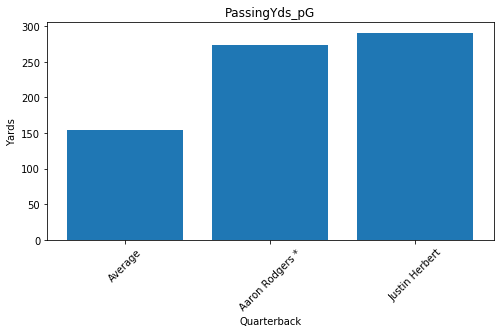

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.3
Tennessee Titans Passing_Yds_pG: 276.0
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Denver Broncos Passing_Yds_pG: 230.07
--------------------------------------------------


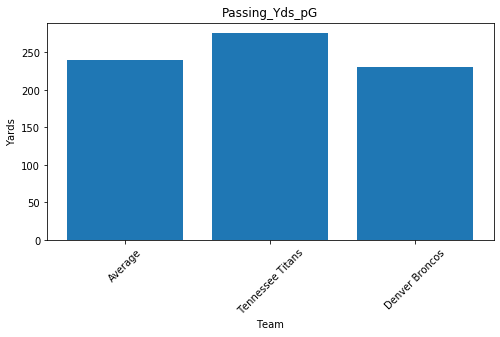

In [46]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Quarterbacks

Avg PassesAttempted_pG: 22.05
Aaron Rodgers * PassesAttempted_pG: 34.07
--------------------------------------------------
Avg PassesAttempted_pG: 22.05
Justin Herbert PassesAttempted_pG: 40.85
--------------------------------------------------


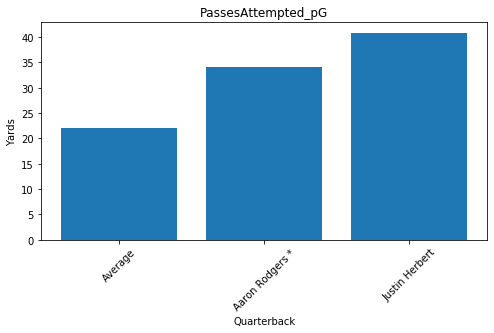

----------------------------------------
Defense

Avg Passing_Att_pG: 35.15
Tennessee Titans Passing_Att_pG: 40.36
--------------------------------------------------
Avg Passing_Att_pG: 35.15
Denver Broncos Passing_Att_pG: 35.43
--------------------------------------------------


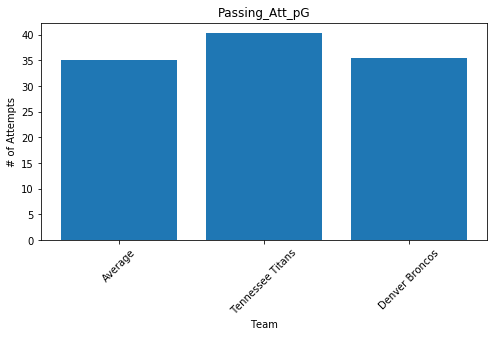

In [47]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Att_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Att_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Att_pG', 'Team', '# of Attempts')

Quarterbacks

Avg Completion_Percent: 0.62
Aaron Rodgers * Completion_Percent: 0.7
--------------------------------------------------
Avg Completion_Percent: 0.62
Justin Herbert Completion_Percent: 0.66
--------------------------------------------------


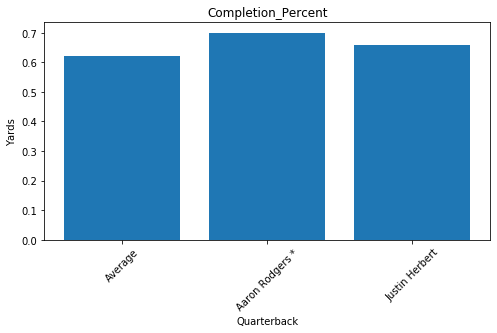

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.65
Tennessee Titans Completion_Percent_Allowed: 0.66
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Denver Broncos Completion_Percent_Allowed: 0.66
--------------------------------------------------


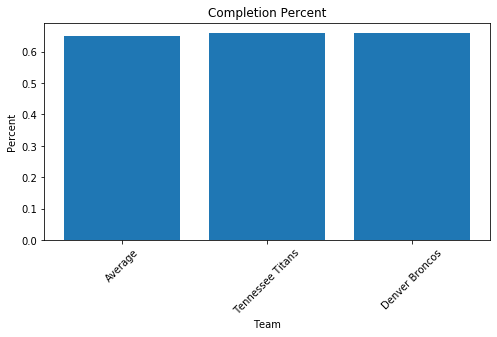

In [48]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Completion_Percent_Allowed', def1)
average, defteam2, team2 = print_metric_team(defense, 'Completion_Percent_Allowed', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Completion Percent', 'Team', 'Percent')

Quarterbacks

Avg RushingYds_pG: 11.34
Aaron Rodgers * RushingYds_pG: 9.0
--------------------------------------------------
Avg RushingYds_pG: 11.34
Justin Herbert RushingYds_pG: 15.31
--------------------------------------------------


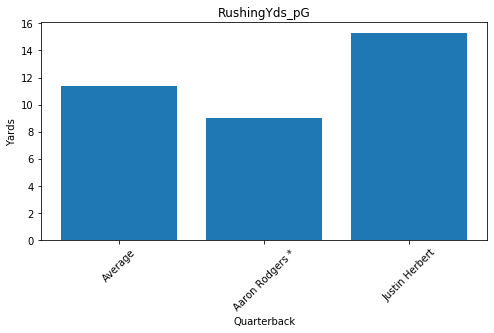

----------------------------------------
Defense

Avg Rushing_Yds_pG: 117.55
Tennessee Titans Rushing_Yds_pG: 114.5
--------------------------------------------------
Avg Rushing_Yds_pG: 117.55
Denver Broncos Rushing_Yds_pG: 134.64
--------------------------------------------------


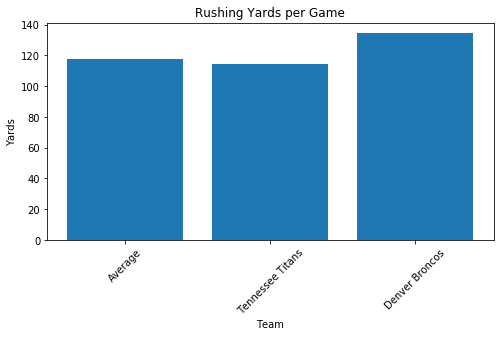

In [49]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Rushing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Rushing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Rushing Yards per Game', 'Team', 'Yards')

Quarterbacks

Avg PassingTDs_pG: 0.93
Aaron Rodgers * PassingTDs_pG: 2.86
--------------------------------------------------
Avg PassingTDs_pG: 0.93
Justin Herbert PassingTDs_pG: 2.08
--------------------------------------------------


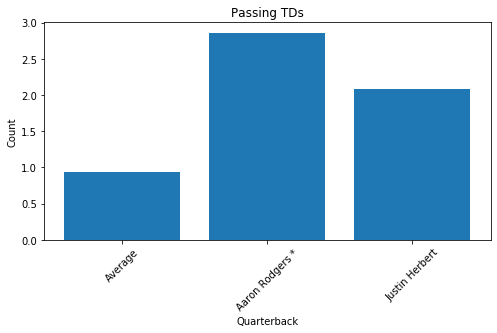

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Tennessee Titans Passing_TDs_pG: 2.07
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Denver Broncos Passing_TDs_pG: 1.29
--------------------------------------------------


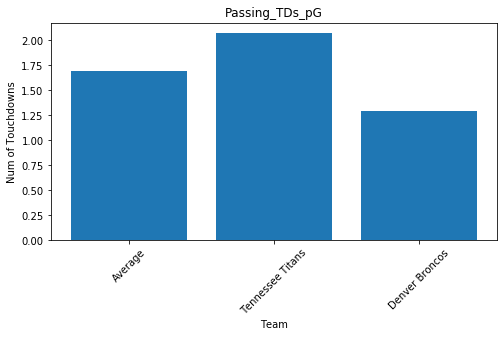

In [50]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingTDs_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingTDs_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Passing TDs', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Quarterbacks

Avg Ttl_Turnovers_pG: 0.67
Aaron Rodgers * Ttl_Turnovers_pG: 0.43
--------------------------------------------------
Avg Ttl_Turnovers_pG: 0.67
Justin Herbert Ttl_Turnovers_pG: 0.85
--------------------------------------------------


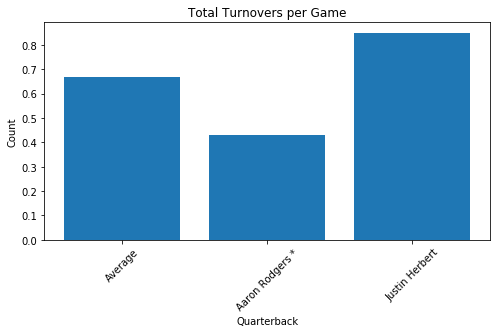

----------------------------------------
Defense

Avg Ttl_Turnovers_pG: 1.3
Tennessee Titans Ttl_Turnovers_pG: 1.5
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
Denver Broncos Ttl_Turnovers_pG: 0.86
--------------------------------------------------


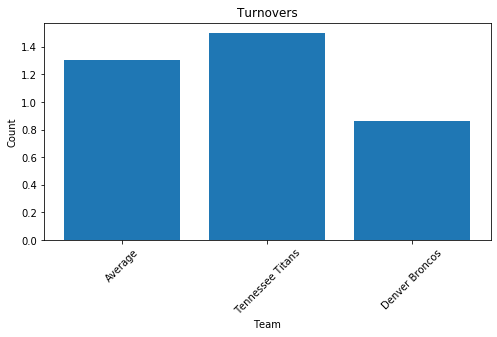

In [51]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Total Turnovers per Game', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Ttl_Turnovers_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Turnovers_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Turnovers', 'Team', 'Count')

#### Additional Defense Stats

Avg RZ_Percent: 61.59
Tennessee Titans RZ_Percent: 70.9
--------------------------------------------------
Avg RZ_Percent: 61.59
Denver Broncos RZ_Percent: 49.1
--------------------------------------------------


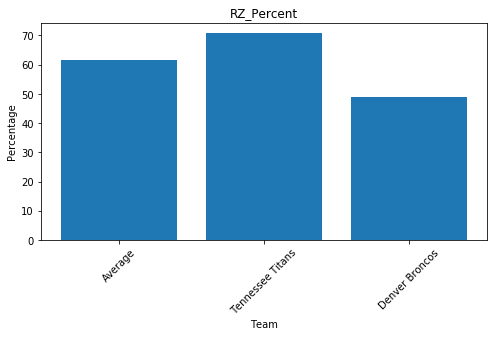

In [52]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Ttl_Pts_Allowed_pG: 24.76
Tennessee Titans Ttl_Pts_Allowed_pG: 25.79
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.76
Denver Broncos Ttl_Pts_Allowed_pG: 28.21
--------------------------------------------------


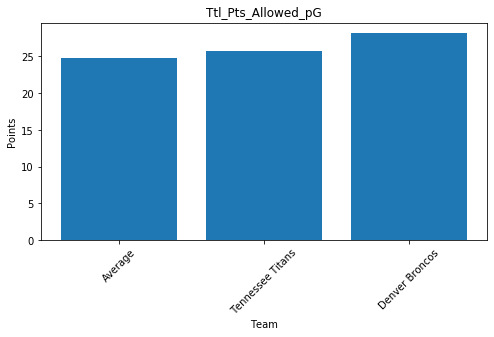

In [53]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Sacks_pG: 2.21
Tennessee Titans Sacks_pG: 1.0
--------------------------------------------------
Avg Sacks_pG: 2.21
Denver Broncos Sacks_pG: 2.64
--------------------------------------------------


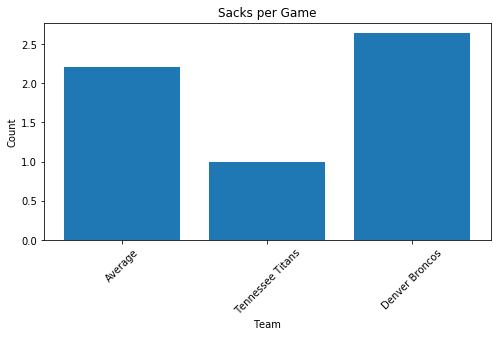

In [54]:
average, defteam1, team1 = print_metric_team(defense, 'Sacks_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Sacks_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Sacks per Game', 'Team', 'Count')



## Runningbacks

In [55]:
runningbacks = offense[offense['Position'] == 'RB']

In [56]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [57]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook*,MIN,RB,25,13,13,0,0,0,0,0,297,1484,5.00,15,52,42,349,11.10,1,4,3,16,3,0,300.30,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.85,114.15,4.00,3.23,1.15,0.08,0.23
1,Derrick Henry *,TEN,RB,26,14,14,0,0,0,0,0,321,1679,7.30,15,31,19,114,6.00,0,1,1,15,1,0,278.80,2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.93,119.93,2.21,1.36,1.07,0.00,0.07
2,Alvin Kamara*,NOR,RB,25,14,9,0,0,0,0,0,165,777,11.10,10,102,80,739,11.40,5,1,0,15,0,0,281.60,3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.79,55.50,7.29,5.71,0.71,0.36,0.00
8,James Robinson,JAX,RB,22,14,14,0,0,0,0,0,240,1070,8.60,7,60,49,344,7.20,3,3,1,10,1,0,225.90,4,9,201.40,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.90,11.20,9.40,21.90,16.80,8.30,11.30,17.14,76.43,4.29,3.50,0.50,0.21,0.07
12,Aaron Jones*,GNB,RB,26,12,12,0,0,0,0,0,180,968,8.80,8,55,41,298,9.70,2,2,0,10,0,0,207.10,5,13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,80.67,4.58,3.42,0.67,0.17,0.00


In [66]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry *,TEN,RB,26,14,14,0,0,0,0,0,321,1679,7.30,15,31,19,114,6.00,0,1,1,15,1,0,278.80,2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.93,119.93,2.21,1.36,1.07,0.00,0.07
47,Chris Carson,SEA,RB,26,10,10,0,0,0,0,0,114,568,13.80,5,41,32,238,11.40,4,1,0,9,0,0,150.60,18,48,134.60,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,0.00,0.00,0.00,11.90,17.00,15.80,6.90,11.40,56.80,4.10,3.20,0.50,0.40,0.00
55,D'Andre Swift,DET,RB,21,11,2,0,0,0,0,0,92,422,9.90,7,49,39,316,9.00,2,2,1,9,0,0,145.30,21,56,125.80,8.30,7.20,1.90,11.20,0.00,24.30,10.80,2.30,9.70,20.90,0.00,0.00,0.00,11.00,18.20,8.36,38.36,4.45,3.55,0.64,0.18,0.09
66,Nyheim Hines,IND,RB,24,14,2,0,0,0,0,0,79,319,4.40,3,65,53,412,14.70,4,0,0,7,1,0,143.60,22,67,117.10,19.30,0.40,6.10,3.20,3.00,2.70,0.00,18.20,3.80,23.50,5.30,9.50,9.20,7.50,5.40,5.64,22.79,4.64,3.79,0.21,0.29,0.00


In [67]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [68]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook*,MIN,RB,13,13,3.86,4.21,1.97,2.05,4.53,0.36,3.88
1,Derrick Henry *,TEN,RB,14,14,3.87,4.47,0.61,0.26,4.17,-0.50,0.89
2,Alvin Kamara*,NOR,RB,14,9,1.53,1.62,4.48,4.43,2.58,3.46,-0.46
12,Aaron Jones*,GNB,RB,12,12,2.21,2.73,2.42,2.23,2.37,1.35,-0.46
18,Josh Jacobs*,LVR,RB,13,13,3.02,2.25,1.39,1.39,2.83,-0.50,2.43


In [69]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
2,Alvin Kamara*,NOR,RB,14,9,1.53,1.62,4.48,4.43,2.58,3.46,-0.46,18.56
12,Aaron Jones*,GNB,RB,12,12,2.21,2.73,2.42,2.23,2.37,1.35,-0.46,13.76
47,Chris Carson,SEA,RB,10,10,1.45,1.67,2.05,2.03,1.63,3.94,-0.46,13.22
0,Dalvin Cook*,MIN,RB,13,13,3.86,4.21,1.97,2.05,4.53,0.36,3.88,13.11
1,Derrick Henry *,TEN,RB,14,14,3.87,4.47,0.61,0.26,4.17,-0.50,0.89,12.00
66,Nyheim Hines,IND,RB,14,2,0.24,0.17,2.46,2.59,0.37,2.67,-0.46,8.95
55,D'Andre Swift,DET,RB,11,2,0.81,0.86,2.32,2.36,2.24,1.52,1.25,8.85
18,Josh Jacobs*,LVR,RB,13,13,3.02,2.25,1.39,1.39,2.83,-0.50,2.43,7.94
221,Salvon Ahmed,MIA,RB,4,3,2.36,2.35,0.83,0.64,1.63,-0.50,-0.46,7.77
139,Rex Burkhead,NWE,RB,10,0,0.46,0.37,1.44,1.35,0.75,2.83,-0.46,7.66


In [73]:
rb1 = 47
rb2 = 1
rb3 = 66
rb4 = 55
rb5 = 221
rb6 = 139

Week 16 opponents:
    
    Seattle Seahawks vs Los Angeles Rams
    Tennessee Titans vs Green Bay Packers
    Indianapolis Colts vs Pittsburgh Steelers
    Detroit Lions vs Tampa Bay Buccaneers
    Miami Dolphins vs Las Vegas Raiders
    New England Patriots vs Buffalo Bills

In [70]:
rb_opp = ['Los Angeles Rams', 'Green Bay Packers', 'Pittsburgh Steelers', 'Tampa Bay Buccaneers', 'Las Vegas Raiders',
          'Buffalo Bills']

defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
1,Pittsburgh Steelers,14,264,867,4.80,4170,355,1464,4.10,9,465,5.30,260,11.60,2706,20,39,21,53.80,25,17,8,47,135.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00,2.00,18.86,297.86,25.36,104.57,0.64,33.21,18.57,0.56,193.29,1.43,2.07,1.79,0.57,3.36,9.64
2,Los Angeles Rams,14,269,879,4.60,4005,346,1317,3.80,11,489,5.00,308,9.70,2688,15,41,24,58.50,21,13,8,44,125.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00,2.00,19.21,286.07,24.71,94.07,0.79,34.93,22.00,0.63,192.00,1.07,1.86,1.50,0.57,3.14,8.93
11,Tampa Bay Buccaneers,14,321,902,5.20,4663,317,1089,3.40,9,542,6.10,376,10.40,3574,27,46,29,63.00,21,14,7,43,100.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,4.00,4.00,0.00,9.00,3.00,22.93,333.07,22.64,77.79,0.64,38.71,26.86,0.69,255.29,1.93,2.57,1.50,0.50,3.07,7.14
13,Green Bay Packers,14,339,845,5.60,4728,339,1541,4.50,14,468,6.30,302,11.30,3187,22,45,28,62.20,14,8,6,38,81.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,6.00,4.00,15.00,10.00,4.00,6.00,24.21,337.71,24.21,110.07,1.00,33.43,21.57,0.65,227.64,1.57,2.57,1.00,0.43,2.71,5.79
15,Buffalo Bills,14,340,897,5.60,4985,370,1699,4.60,18,493,6.20,324,10.70,3286,22,54,35,64.80,22,12,10,34,90.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,12.00,6.00,0.00,6.00,4.00,12.00,12.00,24.29,356.07,26.43,121.36,1.29,35.21,23.14,0.66,234.71,1.57,2.86,1.57,0.71,2.43,6.43
28,Las Vegas Raiders,14,421,901,6.00,5396,381,1761,4.60,23,504,7.00,319,11.70,3635,24,59,39,66.10,15,10,5,16,35.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,4.00,16.00,-2.00,-1.00,8.00,-4.00,0.00,30.07,385.43,27.21,125.79,1.64,36.00,22.79,0.63,259.64,1.71,3.36,1.07,0.36,1.14,2.50


In [71]:
teamRB1 = 2
teamRB2 = 13
teamRB3 = 1
teamRB4 = 11
teamRB5 = 28
teamRB6 = 15

### Running Back Comparison

Running Backs

Avg RushingAttempts_pG: 4.5
Chris Carson RushingAttempts_pG: 11.4
--------------------------------------------------
Avg RushingAttempts_pG: 4.5
Derrick Henry * RushingAttempts_pG: 22.93
--------------------------------------------------
Avg RushingAttempts_pG: 4.5
Nyheim Hines RushingAttempts_pG: 5.64
--------------------------------------------------
Avg RushingAttempts_pG: 4.5
D'Andre Swift RushingAttempts_pG: 8.36
--------------------------------------------------
Avg RushingAttempts_pG: 4.5
Salvon Ahmed RushingAttempts_pG: 15.75
--------------------------------------------------
Avg RushingAttempts_pG: 4.5
Rex Burkhead RushingAttempts_pG: 6.7
--------------------------------------------------


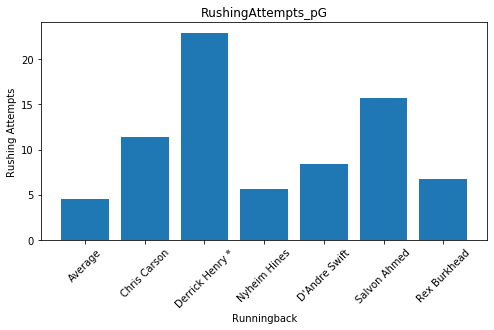

----------------------------------------
Defense

Avg Rushing_Att_pG: 27.02
Los Angeles Rams Rushing_Att_pG: 24.71
--------------------------------------------------
Avg Rushing_Att_pG: 27.02
Green Bay Packers Rushing_Att_pG: 24.21
--------------------------------------------------
Avg Rushing_Att_pG: 27.02
Pittsburgh Steelers Rushing_Att_pG: 25.36
--------------------------------------------------
Avg Rushing_Att_pG: 27.02
Tampa Bay Buccaneers Rushing_Att_pG: 22.64
--------------------------------------------------
Avg Rushing_Att_pG: 27.02
Las Vegas Raiders Rushing_Att_pG: 27.21
--------------------------------------------------
Avg Rushing_Att_pG: 27.02
Buffalo Bills Rushing_Att_pG: 26.43
--------------------------------------------------


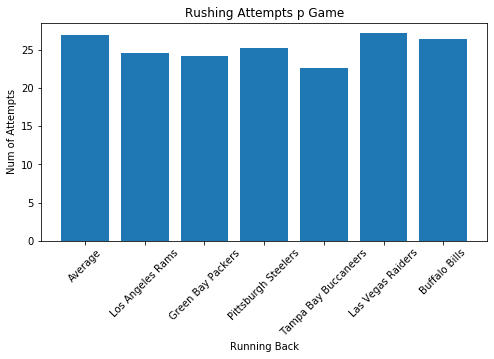

In [74]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingAttempts_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingAttempts_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingAttempts_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Att_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Running Backs

Avg RushingYds_pG: 19.0
Chris Carson RushingYds_pG: 56.8
--------------------------------------------------
Avg RushingYds_pG: 19.0
Derrick Henry * RushingYds_pG: 119.93
--------------------------------------------------
Avg RushingYds_pG: 19.0
Nyheim Hines RushingYds_pG: 22.79
--------------------------------------------------
Avg RushingYds_pG: 19.0
D'Andre Swift RushingYds_pG: 38.36
--------------------------------------------------
Avg RushingYds_pG: 19.0
Salvon Ahmed RushingYds_pG: 72.0
--------------------------------------------------
Avg RushingYds_pG: 19.0
Rex Burkhead RushingYds_pG: 27.4
--------------------------------------------------


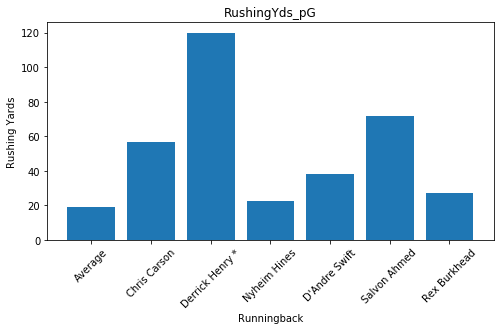

----------------------------------------
Defense

Avg Rushing_Yds_pG: 117.55
Los Angeles Rams Rushing_Yds_pG: 94.07
--------------------------------------------------
Avg Rushing_Yds_pG: 117.55
Green Bay Packers Rushing_Yds_pG: 110.07
--------------------------------------------------
Avg Rushing_Yds_pG: 117.55
Pittsburgh Steelers Rushing_Yds_pG: 104.57
--------------------------------------------------
Avg Rushing_Yds_pG: 117.55
Tampa Bay Buccaneers Rushing_Yds_pG: 77.79
--------------------------------------------------
Avg Rushing_Yds_pG: 117.55
Las Vegas Raiders Rushing_Yds_pG: 125.79
--------------------------------------------------
Avg Rushing_Yds_pG: 117.55
Buffalo Bills Rushing_Yds_pG: 121.36
--------------------------------------------------


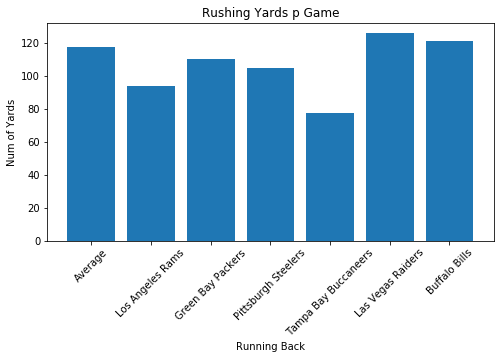

In [75]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingYds_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingYds_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingYds_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Running Backs

Avg RushingTDs_pG: 0.13
Chris Carson RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.13
Derrick Henry * RushingTDs_pG: 1.07
--------------------------------------------------
Avg RushingTDs_pG: 0.13
Nyheim Hines RushingTDs_pG: 0.21
--------------------------------------------------
Avg RushingTDs_pG: 0.13
D'Andre Swift RushingTDs_pG: 0.64
--------------------------------------------------
Avg RushingTDs_pG: 0.13
Salvon Ahmed RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.13
Rex Burkhead RushingTDs_pG: 0.3
--------------------------------------------------


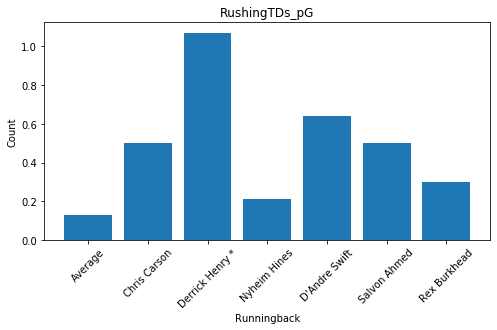

----------------------------------------
Defense

Avg Rushing_TDs_pG: 1.03
Los Angeles Rams Rushing_TDs_pG: 0.79
--------------------------------------------------
Avg Rushing_TDs_pG: 1.03
Green Bay Packers Rushing_TDs_pG: 1.0
--------------------------------------------------
Avg Rushing_TDs_pG: 1.03
Pittsburgh Steelers Rushing_TDs_pG: 0.64
--------------------------------------------------
Avg Rushing_TDs_pG: 1.03
Tampa Bay Buccaneers Rushing_TDs_pG: 0.64
--------------------------------------------------
Avg Rushing_TDs_pG: 1.03
Las Vegas Raiders Rushing_TDs_pG: 1.64
--------------------------------------------------
Avg Rushing_TDs_pG: 1.03
Buffalo Bills Rushing_TDs_pG: 1.29
--------------------------------------------------


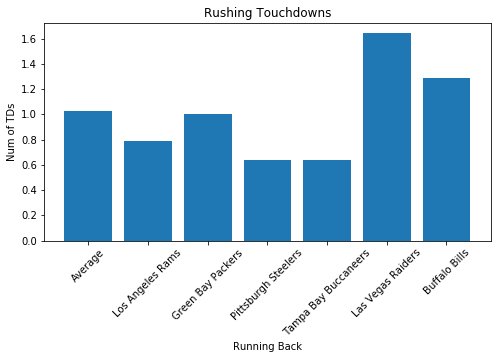

In [76]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingTDs_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingTDs_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingTDs_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingTDs_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingTDs_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingTDs_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingTDs_pG', 'Runningback', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')

Running Backs

Avg LostFumbles_pG: 0.02
Chris Carson LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Derrick Henry * LostFumbles_pG: 0.07
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Nyheim Hines LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
D'Andre Swift LostFumbles_pG: 0.09
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Salvon Ahmed LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Rex Burkhead LostFumbles_pG: 0.0
--------------------------------------------------


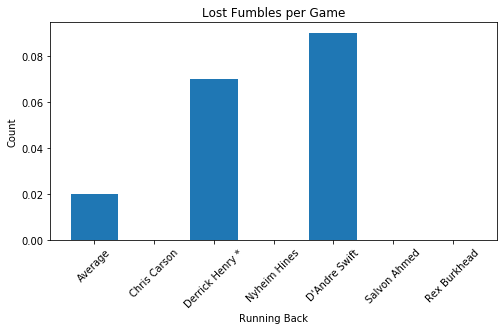

----------------------------------------
Defense

Avg Fumbles_pG: 0.54
Los Angeles Rams Fumbles_pG: 0.57
--------------------------------------------------
Avg Fumbles_pG: 0.54
Green Bay Packers Fumbles_pG: 0.43
--------------------------------------------------
Avg Fumbles_pG: 0.54
Pittsburgh Steelers Fumbles_pG: 0.57
--------------------------------------------------
Avg Fumbles_pG: 0.54
Tampa Bay Buccaneers Fumbles_pG: 0.5
--------------------------------------------------
Avg Fumbles_pG: 0.54
Las Vegas Raiders Fumbles_pG: 0.36
--------------------------------------------------
Avg Fumbles_pG: 0.54
Buffalo Bills Fumbles_pG: 0.71
--------------------------------------------------


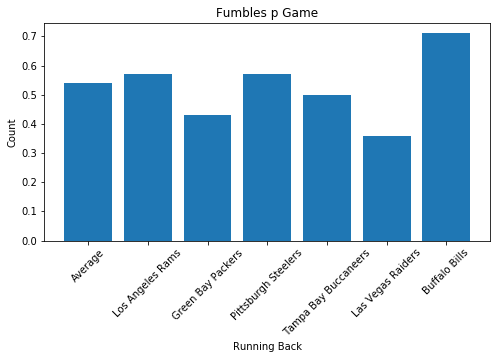

In [77]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'LostFumbles_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'LostFumbles_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'LostFumbles_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'LostFumbles_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'LostFumbles_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'LostFumbles_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Lost Fumbles per Game', 'Running Back', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Fumbles_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Fumbles_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Fumbles_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Fumbles_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Fumbles_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Fumbles_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Fumbles p Game', 'Running Back', 'Count')

#### Additional Running Back Analysis

Avg Targeted_pG: 1.41
Chris Carson Targeted_pG: 4.1
--------------------------------------------------
Avg Targeted_pG: 1.41
Derrick Henry * Targeted_pG: 2.21
--------------------------------------------------
Avg Targeted_pG: 1.41
Nyheim Hines Targeted_pG: 4.64
--------------------------------------------------
Avg Targeted_pG: 1.41
D'Andre Swift Targeted_pG: 4.45
--------------------------------------------------
Avg Targeted_pG: 1.41
Salvon Ahmed Targeted_pG: 2.5
--------------------------------------------------
Avg Targeted_pG: 1.41
Rex Burkhead Targeted_pG: 3.3
--------------------------------------------------


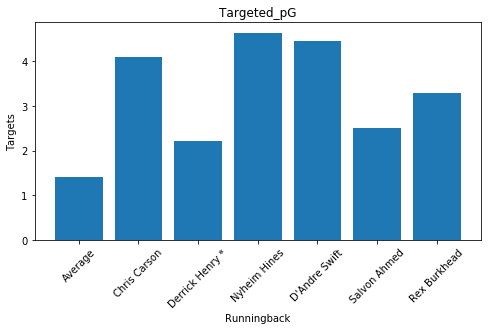

In [78]:
average, rb_1, _1rb = print_metric(available_rbs, 'Targeted_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Targeted_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Targeted_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Targeted_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Targeted_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Targeted_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.09
Chris Carson Receptions_pG: 3.2
--------------------------------------------------
Avg Receptions_pG: 1.09
Derrick Henry * Receptions_pG: 1.36
--------------------------------------------------
Avg Receptions_pG: 1.09
Nyheim Hines Receptions_pG: 3.79
--------------------------------------------------
Avg Receptions_pG: 1.09
D'Andre Swift Receptions_pG: 3.55
--------------------------------------------------
Avg Receptions_pG: 1.09
Salvon Ahmed Receptions_pG: 1.75
--------------------------------------------------
Avg Receptions_pG: 1.09
Rex Burkhead Receptions_pG: 2.5
--------------------------------------------------


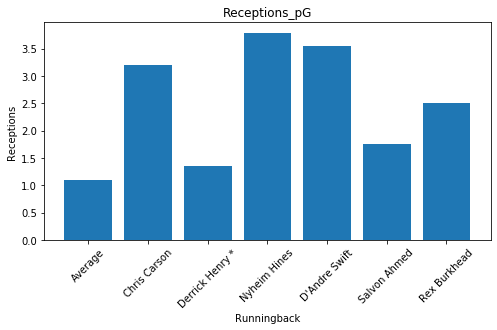

In [79]:
average, rb_1, _1rb = print_metric(available_rbs, 'Receptions_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Receptions_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Receptions_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Receptions_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Receptions_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Receptions_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')


## Tight End

In [60]:
tight_ends = offense[offense['Position'] == 'TE']

In [61]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [62]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
4,Travis Kelce,KAN,TE,31,13,13,1,2,4,0,0,0,0,0.00,0,120,90,1250,21.90,9,1,1,9,0,0,222.20,1,5,177.20,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,0.00,18.90,8.20,19.60,19.60,9.23,6.92,96.15,0.69,0.08
18,Darren Waller,LVR,TE,28,13,12,0,0,0,0,0,0,0,0.00,0,117,84,817,16.30,7,1,1,7,0,0,163.70,2,19,121.70,4.50,16.30,0.90,6.80,10.80,0.00,11.00,2.80,8.20,3.70,14.80,2.30,32.00,7.50,9.00,6.46,62.85,0.54,0.08
33,Robert Tonyan,GNB,TE,26,13,8,0,0,0,0,0,0,0,0.00,0,52,46,533,16.90,9,0,0,9,0,0,130.30,3,34,107.30,0.00,8.50,11.00,27.80,0.00,2.50,3.20,7.90,0.50,3.30,10.40,12.70,9.90,9.60,4.00,3.54,41.00,0.69,0.00
37,T.J. Hockenson,DET,TE,23,13,13,0,0,0,0,0,0,0,0.00,0,88,58,657,14.30,6,0,0,6,1,0,132.70,4,38,103.70,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,9.90,1.30,6.80,8.90,8.40,10.30,6.77,4.46,50.54,0.46,0.00
45,Mike Gesicki,MIA,TE,25,13,9,0,0,0,0,0,0,0,0.00,0,68,44,602,19.80,6,0,0,6,0,0,118.20,5,46,96.20,3.00,19.00,7.50,1.50,9.10,0.00,0.00,0.80,4.20,4.00,4.30,9.50,14.80,18.50,5.23,3.38,46.31,0.46,0.00


In [63]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
59,Rob Gronkowski,TAM,TE,31,13,13,0,0,0,0,0,0,0,0.00,0,64,38,507,16.40,5,1,0,5,0,0,99.70,8,60,80.70,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,0.20,11.10,2.50,10.60,0.00,6.20,4.92,2.92,39.00,0.38,0.00


In [64]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [65]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
33,Robert Tonyan,GNB,TE,26,13,8,1.39,2.16,2.40,3.80,-0.33
54,Jonnu Smith,TEN,TE,25,12,11,1.55,1.33,1.44,3.06,-0.33
59,Rob Gronkowski,TAM,TE,31,13,13,1.99,1.58,2.22,1.72,-0.33
60,Logan Thomas,WAS,TE,29,13,12,2.58,2.38,1.97,1.72,-0.33
147,Jimmy Graham,CHI,TE,34,13,12,2.09,1.87,1.24,2.24,-0.33


In [66]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
350,C.J. Uzomah,CIN,TE,27,2,2,2.36,2.60,2.61,2.50,-0.33,10.39
33,Robert Tonyan,GNB,TE,26,13,8,1.39,2.16,2.40,3.80,-0.33,10.07
60,Logan Thomas,WAS,TE,29,13,12,2.58,2.38,1.97,1.72,-0.33,8.97
288,O.J. Howard,TAM,TE,26,4,1,1.88,1.41,2.01,2.50,-0.33,8.12
59,Rob Gronkowski,TAM,TE,31,13,13,1.99,1.58,2.22,1.72,-0.33,7.83
147,Jimmy Graham,CHI,TE,34,13,12,2.09,1.87,1.24,2.24,-0.33,7.75
54,Jonnu Smith,TEN,TE,25,12,11,1.55,1.33,1.44,3.06,-0.33,7.71
157,Hayden Hurst,ATL,TE,27,13,9,2.33,1.94,2.01,0.68,-0.33,7.29
238,Jordan Reed,SFO,TE,30,8,1,1.96,1.65,1.17,1.65,-0.33,6.75
153,Dalton Schultz,DAL,TE,24,13,11,2.43,2.52,2.24,0.68,1.72,6.15


In [67]:
te1 = 60
te2 = 59
te3 = 147
te4 = 54

Week 13 Opponents:
    
    Washington Football Team vs Seattle Seahawks
    Tampa Bay Buccaneers vs Atlanta Falcons
    Chicago Bears vs Minnesota Vikings
    Tennessee Titans vs Detroit Lions

In [68]:
te_opp = ['Seattle Seahawks', 'Atlanta Falcons', 'Minnesota Vikings', 'Detroit Lions']
defense[defense['Team'].isin(te_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
15,Atlanta Falcons,13,322,838,6.10,5078,319,1415,4.40,12,494,7.10,344,11.20,3663,26,44,30,68.20,18,9,9,25,66.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,6.00,3.00,0.00,5.00,28.00,4.00,4.00,24.77,390.62,24.54,108.85,0.92,38.00,26.46,0.70,281.77,2.00,2.92,1.38,0.69,1.92,5.08
17,Seattle Seahawks,13,324,894,5.70,5074,319,1241,3.90,16,539,6.70,363,11.00,3833,21,48,31,64.60,18,11,7,36,80.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,3.00,5.00,5.00,9.00,9.00,12.00,24.92,390.31,24.54,95.46,1.23,41.46,27.92,0.67,294.85,1.62,2.85,1.38,0.54,2.77,6.15
23,Minnesota Vikings,13,355,845,5.80,4895,363,1559,4.30,8,461,6.90,302,11.40,3336,26,44,23,52.30,17,11,6,21,57.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,3.00,9.00,10.00,4.00,5.00,13.00,0.00,27.31,376.54,27.92,119.92,0.62,35.46,23.23,0.66,256.62,2.00,2.62,1.31,0.46,1.62,4.38
28,Detroit Lions,13,389,858,6.00,5157,392,1727,4.40,21,448,7.40,303,11.80,3430,26,51,36,70.60,12,7,5,18,27.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,-1.00,29.92,396.69,30.15,132.85,1.62,34.46,23.31,0.68,263.85,2.00,3.62,0.92,0.38,1.38,2.08


In [69]:
teamTE1 = 17
teamTE2 = 15
teamTE3 = 23
teamTE4 = 28

#### Tight End Comparison

Tight Ends

Avg Targeted_pG: 1.83
Logan Thomas Targeted_pG: 5.85
--------------------------------------------------
Avg Targeted_pG: 1.83
Rob Gronkowski Targeted_pG: 4.92
--------------------------------------------------
Avg Targeted_pG: 1.83
Jimmy Graham Targeted_pG: 5.08
--------------------------------------------------
Avg Targeted_pG: 1.83
Jonnu Smith Targeted_pG: 4.25
--------------------------------------------------


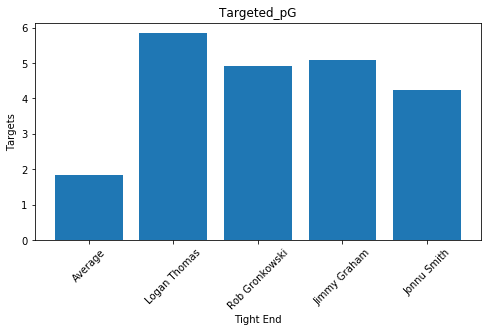

----------------------------------------
Defense

Avg Passing_Att_pG: 35.22
Seattle Seahawks Passing_Att_pG: 41.46
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Atlanta Falcons Passing_Att_pG: 38.0
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Minnesota Vikings Passing_Att_pG: 35.46
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Detroit Lions Passing_Att_pG: 34.46
--------------------------------------------------


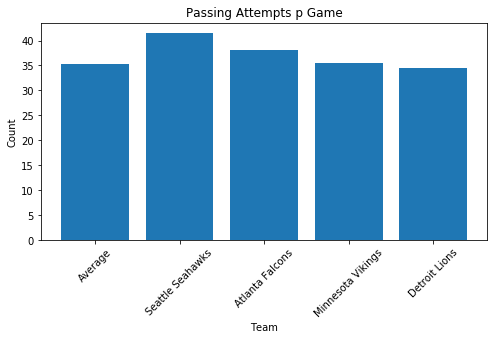

In [70]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Att_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Tight Ends

Avg Receptions_pG: 1.26
Logan Thomas Receptions_pG: 3.77
--------------------------------------------------
Avg Receptions_pG: 1.26
Rob Gronkowski Receptions_pG: 2.92
--------------------------------------------------
Avg Receptions_pG: 1.26
Jimmy Graham Receptions_pG: 3.23
--------------------------------------------------
Avg Receptions_pG: 1.26
Jonnu Smith Receptions_pG: 2.67
--------------------------------------------------


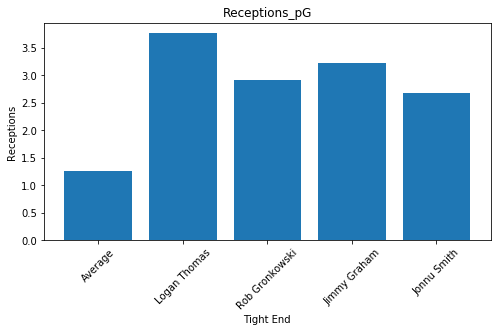

----------------------------------------
Defense

Avg Completions_pG: 23.04
Seattle Seahawks Completions_pG: 27.92
--------------------------------------------------
Avg Completions_pG: 23.04
Atlanta Falcons Completions_pG: 26.46
--------------------------------------------------
Avg Completions_pG: 23.04
Minnesota Vikings Completions_pG: 23.23
--------------------------------------------------
Avg Completions_pG: 23.04
Detroit Lions Completions_pG: 23.31
--------------------------------------------------


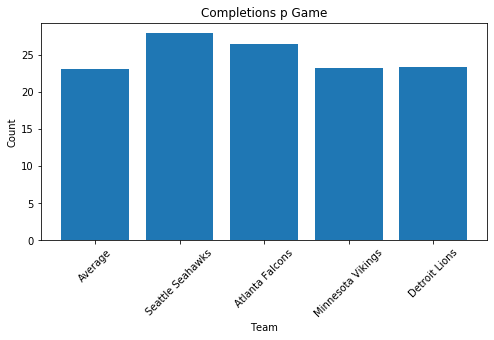

In [71]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Completions_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Tight Ends

Avg ReceivingYds_pG: 13.0
Logan Thomas ReceivingYds_pG: 36.08
--------------------------------------------------
Avg ReceivingYds_pG: 13.0
Rob Gronkowski ReceivingYds_pG: 39.0
--------------------------------------------------
Avg ReceivingYds_pG: 13.0
Jimmy Graham ReceivingYds_pG: 27.46
--------------------------------------------------
Avg ReceivingYds_pG: 13.0
Jonnu Smith ReceivingYds_pG: 29.83
--------------------------------------------------


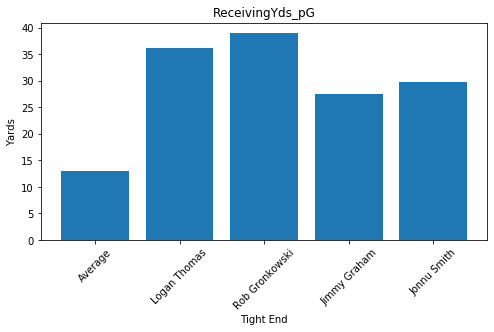

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.3
Seattle Seahawks Passing_Yds_pG: 294.85
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Atlanta Falcons Passing_Yds_pG: 281.77
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Minnesota Vikings Passing_Yds_pG: 256.62
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Detroit Lions Passing_Yds_pG: 263.85
--------------------------------------------------


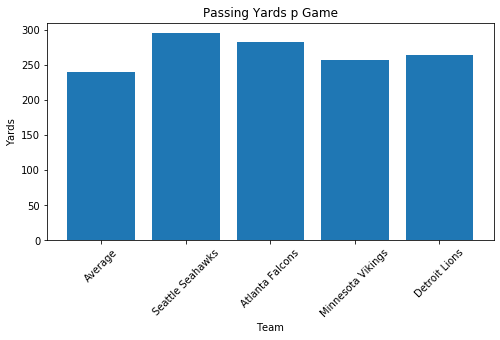

In [72]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamTE4)


x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Tight Ends

Avg ReceivingTDs_pG: 0.13
Logan Thomas ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Rob Gronkowski ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jimmy Graham ReceivingTDs_pG: 0.46
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jonnu Smith ReceivingTDs_pG: 0.58
--------------------------------------------------


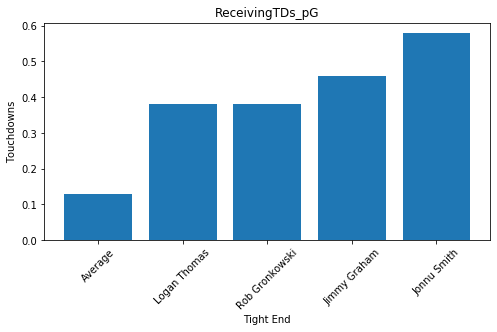

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Seattle Seahawks Passing_TDs_pG: 1.62
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Atlanta Falcons Passing_TDs_pG: 2.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Minnesota Vikings Passing_TDs_pG: 2.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Detroit Lions Passing_TDs_pG: 2.0
--------------------------------------------------


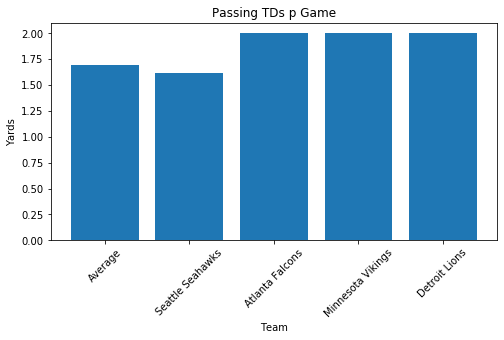

In [73]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')



## Wide Receiver

In [74]:
wrs = offense[offense['Position'] == 'WR']

In [75]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [76]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,13,13,0,0,0,0,0,0,0,0.00,0,127,94,1155,14.90,5,1,1,5,0,0,190.50,8,25,143.50,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,5.50,11.20,13.60,9.77,7.23,0.74,88.85,0.38,0.08
56,Robby Anderson,CAR,WR,27,13,13,0,0,0,0,0,3,16,8.30,0,114,83,996,12.00,2,1,1,2,1,0,154.70,20,57,113.30,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,15.40,0.00,9.70,8.77,6.38,0.73,76.62,0.15,0.08
58,Tyler Boyd,CIN,WR,26,13,8,1,2,16,0,0,4,38,14.00,0,106,78,840,17.70,4,1,0,4,0,0,151.40,22,59,112.40,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,1.50,13.20,4.30,8.15,6.00,0.74,64.62,0.31,0.00
69,Corey Davis,TEN,WR,25,11,9,0,0,0,0,0,0,0,0.00,0,73,56,835,23.10,4,1,1,4,0,0,133.50,28,70,105.50,10.10,9.60,6.90,0.00,0.00,0.00,9.50,18.80,0.00,6.70,11.30,7.00,24.20,1.40,6.64,5.09,0.77,75.91,0.36,0.09
105,Brandin Cooks,HOU,WR,27,12,12,0,0,0,0,0,0,0,0.00,0,86,57,784,20.50,3,0,0,3,0,0,124.90,34,,96.40,2.00,9.50,2.30,0.00,22.10,12.80,6.00,0.00,14.30,3.90,8.50,8.50,6.50,0.00,7.17,4.75,0.66,65.33,0.25,0.00
107,Julio Jones,ATL,WR,31,9,9,0,0,0,0,0,0,0,0.00,0,68,51,771,16.20,3,0,0,3,0,0,120.60,35,,95.10,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,0.00,3.90,0.00,9.40,0.00,7.56,5.67,0.75,85.67,0.33,0.00


In [77]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,13,13,0,0,0,0,0,0,0,0.00,0,127,94,1155,14.90,5,1,1,5,0,0,190.50,8,25,143.50,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,5.50,11.20,13.60,9.77,7.23,0.74,88.85,0.38,0.08
47,Chase Claypool,PIT,WR,22,13,4,0,0,0,0,0,9,22,6.40,2,84,50,664,15.80,8,3,1,10,0,0,151.60,17,48,126.60,4.70,14.80,2.40,0.00,35.60,14.10,0.20,8.20,7.30,17.30,11.90,5.20,3.80,1.50,6.46,3.85,0.60,51.08,0.62,0.08
56,Robby Anderson,CAR,WR,27,13,13,0,0,0,0,0,3,16,8.30,0,114,83,996,12.00,2,1,1,2,1,0,154.70,20,57,113.30,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,15.40,0.00,9.70,8.77,6.38,0.73,76.62,0.15,0.08
57,Cole Beasley,BUF,WR,31,13,9,1,1,20,1,0,0,0,0.00,0,92,71,838,19.00,4,0,0,4,0,0,148.10,21,58,112.60,5.80,7.00,10.00,9.20,5.30,10.50,11.20,2.40,3.90,16.90,0.00,7.30,19.00,4.10,7.08,5.46,0.77,64.46,0.31,0.00
58,Tyler Boyd,CIN,WR,26,13,8,1,2,16,0,0,4,38,14.00,0,106,78,840,17.70,4,1,0,4,0,0,151.40,22,59,112.40,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,1.50,13.20,4.30,8.15,6.00,0.74,64.62,0.31,0.00


In [78]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,13,13,2.88,3.36,0.47,3.13,1.67,1.00
47,Chase Claypool,PIT,WR,13,4,1.45,1.18,-0.39,1.28,3.17,1.00
56,Robby Anderson,CAR,WR,13,13,2.44,2.82,0.39,2.53,0.17,1.00
57,Cole Beasley,BUF,WR,13,9,1.71,2.22,0.65,1.94,1.17,-0.34
58,Tyler Boyd,CIN,WR,13,8,2.18,2.57,0.44,1.95,1.17,-0.34


In [79]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
24,DeAndre Hopkins,ARI,WR,13,13,2.88,3.36,0.47,3.13,1.67,1.00,10.50
107,Julio Jones,ATL,WR,9,9,1.92,2.36,0.52,2.97,1.34,-0.34,9.46
58,Tyler Boyd,CIN,WR,13,8,2.18,2.57,0.44,1.95,1.17,-0.34,8.65
126,Jamison Crowder,NYJ,WR,9,5,1.97,1.71,-0.31,1.56,2.78,-0.34,8.05
57,Cole Beasley,BUF,WR,13,9,1.71,2.22,0.65,1.94,1.17,-0.34,8.04
64,Brandon Aiyuk,SFO,WR,10,9,2.16,1.93,-0.26,2.01,1.77,-0.34,7.95
339,Chad Hansen,HOU,WR,2,0,1.68,2.57,1.16,2.62,-0.83,-0.34,7.55
56,Robby Anderson,CAR,WR,13,13,2.44,2.82,0.39,2.53,0.17,1.00,7.36
69,Corey Davis,TEN,WR,11,9,1.52,1.99,0.63,2.50,1.53,1.24,6.92
105,Brandin Cooks,HOU,WR,12,12,1.75,1.77,0.01,1.98,0.80,-0.34,6.65


In [81]:
wr1 = 24
wr2 = 107
wr3 = 58
wr4 = 126
wr5 = 57
wr6 = 64
wr7 = 56
wr8 = 69

Week 15 Opponents:

    Arizona Cardinals vs Philadelphia Eagles
    Atlanta Falcons vs Tampa Bay Buccaneers
    Cincinnati Bengals vs Pittsburgh Steelers
    New York Jets vs LA Rams
    Buffalo Bills vs Denver Broncos
    San Francisco 49ers vs Dallas Cowboys
    Carolina Panthers vs Green Bay Packeers
    Tennessee Titans vs Detroit Lions

In [83]:
wr_opp = ['Philadelphia Eagles', 'Tampa Bay Buccaneers', 'Pittsburgh Steelers', 'Los Angeles Rams', 'Denver Broncos', 
          'Dallas Cowboys', 'Green Bay Packers', 'Detroit Lions']
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,13,237,811,4.90,3940,314,1312,4.20,7,452,5.30,253,11.60,2628,19,35,19,54.30,25,17,8,45,133.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00,18.23,303.08,24.15,100.92,0.54,34.77,19.46,0.56,202.15,1.46,2.00,1.92,0.62,3.46,10.23
2,Los Angeles Rams,13,246,815,4.60,3716,315,1224,3.90,10,458,5.00,286,9.70,2492,14,37,22,59.50,21,13,8,42,123.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00,18.92,285.85,24.23,94.15,0.77,35.23,22.00,0.62,191.69,1.08,1.85,1.62,0.62,3.23,9.46
10,Tampa Bay Buccaneers,13,294,837,5.10,4294,304,1052,3.50,9,493,6.10,342,10.30,3242,24,42,26,61.90,21,14,7,40,97.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,4.00,4.00,0.00,9.00,22.62,330.31,23.38,80.92,0.69,37.92,26.31,0.69,249.38,1.85,2.54,1.62,0.54,3.08,7.46
16,Green Bay Packers,13,323,780,5.60,4364,312,1426,4.60,13,433,6.30,281,11.30,2938,22,40,27,67.50,13,8,5,35,75.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,6.00,4.00,15.00,10.00,4.00,24.85,335.69,24.00,109.69,1.00,33.31,21.62,0.65,226.00,1.69,2.69,1.00,0.38,2.69,5.77
18,Philadelphia Eagles,13,328,864,5.20,4523,390,1655,4.20,18,431,6.10,292,10.80,2868,19,39,26,66.70,13,4,9,43,87.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,3.00,8.00,2.00,7.00,9.00,25.23,347.92,30.00,127.31,1.38,33.15,22.46,0.68,220.62,1.46,2.85,1.00,0.69,3.31,6.69
22,Denver Broncos,13,347,859,5.30,4572,367,1703,4.60,17,456,5.80,301,10.30,2869,16,49,24,49.00,11,8,3,36,61.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,3.00,-4.00,12.00,4.00,1.00,10.00,26.69,351.69,28.23,131.00,1.31,35.08,23.15,0.66,220.69,1.23,2.54,0.85,0.23,2.77,4.69
28,Detroit Lions,13,389,858,6.00,5157,392,1727,4.40,21,448,7.40,303,11.80,3430,26,51,36,70.60,12,7,5,18,27.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,-1.00,29.92,396.69,30.15,132.85,1.62,34.46,23.31,0.68,263.85,2.00,3.62,0.92,0.38,1.38,2.08
31,Dallas Cowboys,13,400,847,5.80,4912,417,2115,5.10,17,406,6.50,264,11.10,2797,28,47,29,61.70,14,5,9,24,45.00,4.00,-3.00,0.00,-2.00,9.00,-3.00,2.00,13.00,0.00,0.00,5.00,1.00,1.00,18.00,30.77,377.85,32.08,162.69,1.31,31.23,20.31,0.65,215.15,2.15,3.46,1.08,0.69,1.85,3.46


In [84]:
teamWR1 = 18
teamWR2 = 10
teamWR3 = 0
teamWR4 = 2
teamWR5 = 22
teamWR6 = 31
teamWR7 = 16
teamWR8 = 28

#### Wide Receiver Comparison

Wide Receivers

Avg Targeted_pG: 3.1
DeAndre Hopkins Targeted_pG: 9.77
--------------------------------------------------
Avg Targeted_pG: 3.1
Julio Jones Targeted_pG: 7.56
--------------------------------------------------
Avg Targeted_pG: 3.1
Tyler Boyd Targeted_pG: 8.15
--------------------------------------------------
Avg Targeted_pG: 3.1
Jamison Crowder Targeted_pG: 7.67
--------------------------------------------------
Avg Targeted_pG: 3.1
Cole Beasley Targeted_pG: 7.08
--------------------------------------------------
Avg Targeted_pG: 3.1
Brandon Aiyuk Targeted_pG: 8.1
--------------------------------------------------
Avg Targeted_pG: 3.1
Robby Anderson Targeted_pG: 8.77
--------------------------------------------------
Avg Targeted_pG: 3.1
Corey Davis Targeted_pG: 6.64
--------------------------------------------------


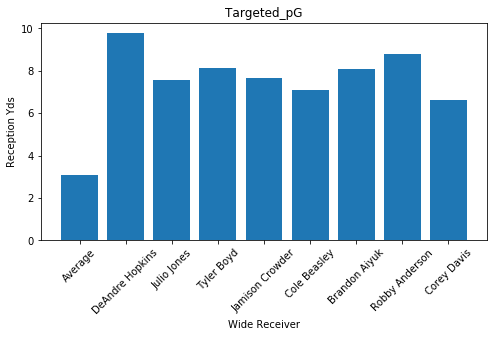

----------------------------------------
Defense

Avg Passing_Att_pG: 35.22
Philadelphia Eagles Passing_Att_pG: 33.15
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Tampa Bay Buccaneers Passing_Att_pG: 37.92
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Pittsburgh Steelers Passing_Att_pG: 34.77
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Los Angeles Rams Passing_Att_pG: 35.23
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Denver Broncos Passing_Att_pG: 35.08
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Dallas Cowboys Passing_Att_pG: 31.23
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Green Bay Packers Passing_Att_pG: 33.31
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Detroit Lions Passing_Att_pG: 34.46
--------------------------------------------------


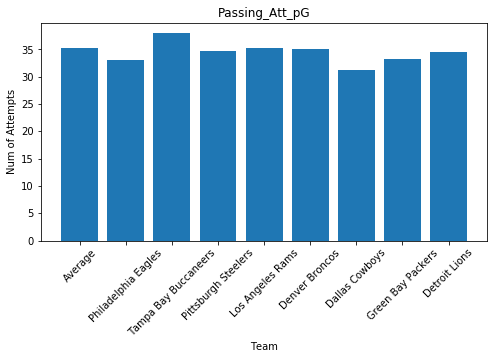

In [85]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Wide Receivers

Avg Receptions_pG: 2.0
DeAndre Hopkins Receptions_pG: 7.23
--------------------------------------------------
Avg Receptions_pG: 2.0
Julio Jones Receptions_pG: 5.67
--------------------------------------------------
Avg Receptions_pG: 2.0
Tyler Boyd Receptions_pG: 6.0
--------------------------------------------------
Avg Receptions_pG: 2.0
Jamison Crowder Receptions_pG: 4.67
--------------------------------------------------
Avg Receptions_pG: 2.0
Cole Beasley Receptions_pG: 5.46
--------------------------------------------------
Avg Receptions_pG: 2.0
Brandon Aiyuk Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.0
Robby Anderson Receptions_pG: 6.38
--------------------------------------------------
Avg Receptions_pG: 2.0
Corey Davis Receptions_pG: 5.09
--------------------------------------------------


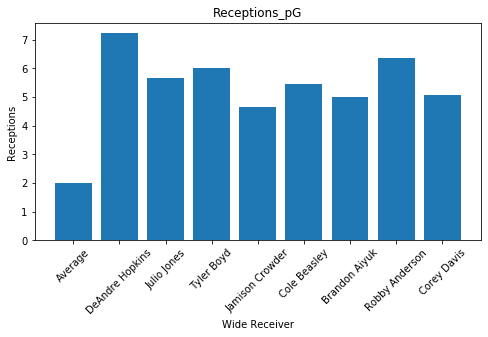

----------------------------------------
Defense

Avg Completions_pG: 23.04
Philadelphia Eagles Completions_pG: 22.46
--------------------------------------------------
Avg Completions_pG: 23.04
Tampa Bay Buccaneers Completions_pG: 26.31
--------------------------------------------------
Avg Completions_pG: 23.04
Pittsburgh Steelers Completions_pG: 19.46
--------------------------------------------------
Avg Completions_pG: 23.04
Los Angeles Rams Completions_pG: 22.0
--------------------------------------------------
Avg Completions_pG: 23.04
Denver Broncos Completions_pG: 23.15
--------------------------------------------------
Avg Completions_pG: 23.04
Dallas Cowboys Completions_pG: 20.31
--------------------------------------------------
Avg Completions_pG: 23.04
Green Bay Packers Completions_pG: 21.62
--------------------------------------------------
Avg Completions_pG: 23.04
Detroit Lions Completions_pG: 23.31
--------------------------------------------------


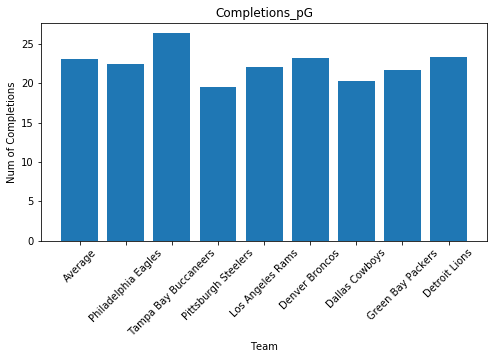

In [86]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Wide Receivers

Avg Catch_Rate: 0.66
DeAndre Hopkins Catch_Rate: 0.74
--------------------------------------------------
Avg Catch_Rate: 0.66
Julio Jones Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.66
Tyler Boyd Catch_Rate: 0.74
--------------------------------------------------
Avg Catch_Rate: 0.66
Jamison Crowder Catch_Rate: 0.61
--------------------------------------------------
Avg Catch_Rate: 0.66
Cole Beasley Catch_Rate: 0.77
--------------------------------------------------
Avg Catch_Rate: 0.66
Brandon Aiyuk Catch_Rate: 0.62
--------------------------------------------------
Avg Catch_Rate: 0.66
Robby Anderson Catch_Rate: 0.73
--------------------------------------------------
Avg Catch_Rate: 0.66
Corey Davis Catch_Rate: 0.77
--------------------------------------------------


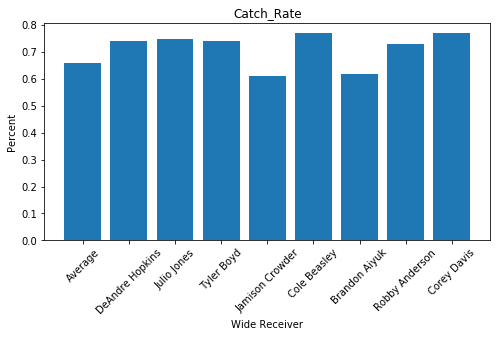

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.65
Philadelphia Eagles Completion_Percent_Allowed: 0.68
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Tampa Bay Buccaneers Completion_Percent_Allowed: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Pittsburgh Steelers Completion_Percent_Allowed: 0.56
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Los Angeles Rams Completion_Percent_Allowed: 0.62
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Denver Broncos Completion_Percent_Allowed: 0.66
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Dallas Cowboys Completion_Percent_Allowed: 0.65
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Green Bay Packers Completion_Percent_Allowed: 0.65
----------------------------

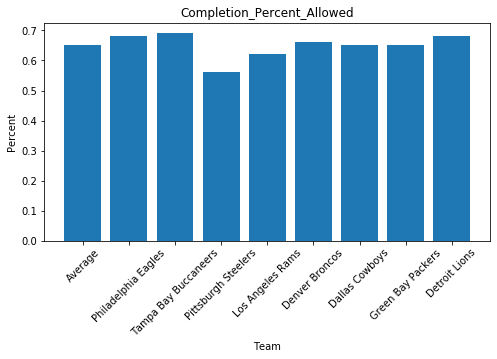

In [87]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Wide Receivers

Avg ReceivingYds_pG: 24.77
DeAndre Hopkins ReceivingYds_pG: 88.85
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Julio Jones ReceivingYds_pG: 85.67
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Tyler Boyd ReceivingYds_pG: 64.62
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Jamison Crowder ReceivingYds_pG: 56.67
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Cole Beasley ReceivingYds_pG: 64.46
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Brandon Aiyuk ReceivingYds_pG: 66.0
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Robby Anderson ReceivingYds_pG: 76.62
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Corey Davis ReceivingYds_pG: 75.91
--------------------------------------------------


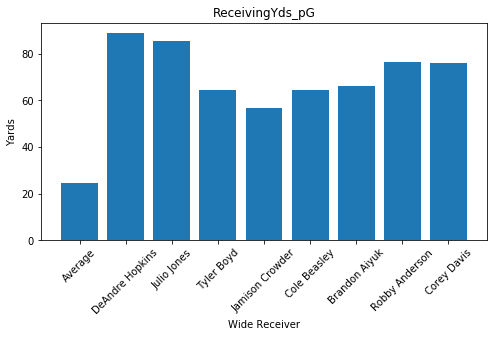

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.3
Philadelphia Eagles Passing_Yds_pG: 220.62
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Tampa Bay Buccaneers Passing_Yds_pG: 249.38
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Pittsburgh Steelers Passing_Yds_pG: 202.15
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Los Angeles Rams Passing_Yds_pG: 191.69
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Denver Broncos Passing_Yds_pG: 220.69
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Dallas Cowboys Passing_Yds_pG: 215.15
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Green Bay Packers Passing_Yds_pG: 226.0
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Detroit Lions Passing_Yds_pG: 263.85
--------------------------------------------------


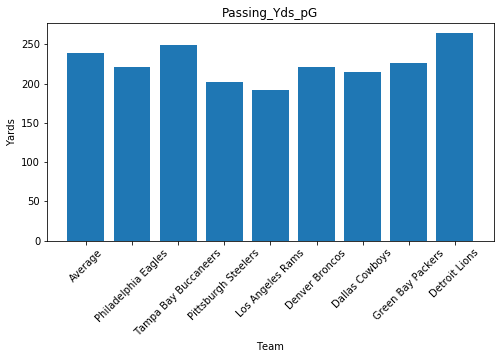

In [88]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Wide Receivers

Avg ReceivingTDs_pG: 0.13
DeAndre Hopkins ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Julio Jones ReceivingTDs_pG: 0.33
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Tyler Boyd ReceivingTDs_pG: 0.31
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jamison Crowder ReceivingTDs_pG: 0.56
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Cole Beasley ReceivingTDs_pG: 0.31
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Brandon Aiyuk ReceivingTDs_pG: 0.4
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Robby Anderson ReceivingTDs_pG: 0.15
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Corey Davis ReceivingTDs_pG: 0.36
--------------------------------------------------


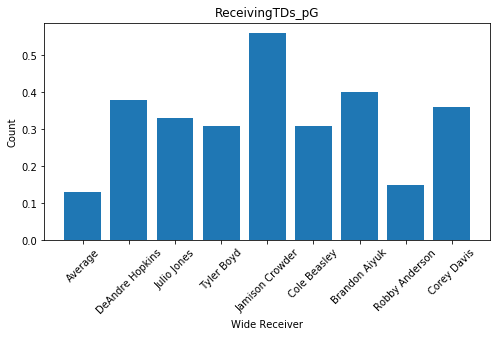

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Philadelphia Eagles Passing_TDs_pG: 1.46
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Tampa Bay Buccaneers Passing_TDs_pG: 1.85
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Pittsburgh Steelers Passing_TDs_pG: 1.46
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Los Angeles Rams Passing_TDs_pG: 1.08
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Denver Broncos Passing_TDs_pG: 1.23
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Dallas Cowboys Passing_TDs_pG: 2.15
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Green Bay Packers Passing_TDs_pG: 1.69
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Detroit Lions Passing_TDs_pG: 2.0
--------------------------------------------------


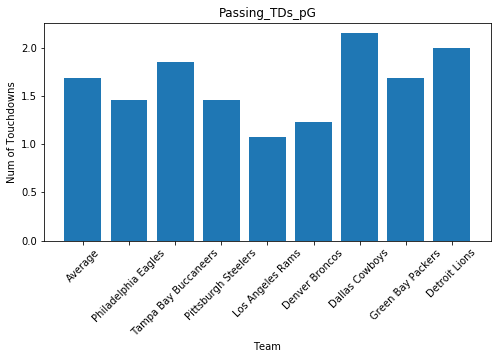

In [89]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

#### Additional Defense Stats

Avg Ttl_Pts_Allowed_pG: 24.67
Philadelphia Eagles Ttl_Pts_Allowed_pG: 25.23
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Tampa Bay Buccaneers Ttl_Pts_Allowed_pG: 22.62
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Pittsburgh Steelers Ttl_Pts_Allowed_pG: 18.23
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Los Angeles Rams Ttl_Pts_Allowed_pG: 18.92
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Denver Broncos Ttl_Pts_Allowed_pG: 26.69
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Dallas Cowboys Ttl_Pts_Allowed_pG: 30.77
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Green Bay Packers Ttl_Pts_Allowed_pG: 24.85
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Detroit Lions Ttl_Pts_Allowed_pG: 29.92
--------------------------------------------------


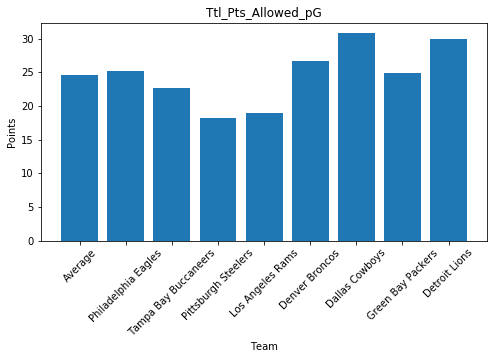

In [90]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')




## Defense

In [91]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [92]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,227,801,7,90,67,470,2,4,1,9,216.00
ARI,309,461,3231,23,10,404,1966,20,434,308,3228,22,16,5,42,1126.60
ATL,318,500,3699,20,11,346,1276,12,482,318,3699,20,7,3,32,1064.30
BAL,209,334,2350,19,9,423,2259,19,321,209,2353,19,14,6,39,954.70
BUF,328,478,3695,30,9,331,1333,10,458,328,3695,30,14,10,40,1145.60


In [93]:
ttl_offense.reset_index(inplace=True)

In [94]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [95]:
num_games = defense[['Team', 'GP']]
num_games.head(3)

,Team,GP
0,Pittsburgh Steelers,13
1,Miami Dolphins,13
2,Los Angeles Rams,13


In [96]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense['Ttl_Turnovers'] = ttl_offense['Interceptions'] + ttl_offense['LostFumbles']
ttl_offense.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers
0,ARI,Arizona Cardinals,13,309,461,3231,23,10,404,1966,20,434,308,3228,22,16,5,42,1126.60,15
1,ATL,Atlanta Falcons,13,318,500,3699,20,11,346,1276,12,482,318,3699,20,7,3,32,1064.30,14
2,BAL,Baltimore Ravens,13,209,334,2350,19,9,423,2259,19,321,209,2353,19,14,6,39,954.70,15
3,BUF,Buffalo Bills,13,328,478,3695,30,9,331,1333,10,458,328,3695,30,14,10,40,1145.60,19
4,CAR,Carolina Panthers,13,314,449,3375,15,10,321,1371,16,429,315,3403,15,7,3,31,1003.90,13


In [97]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'Ttl_Turnovers', 'GP')
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [98]:
taken_def = ['Baltimore Ravens', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams', 'Miami Dolphins', 
             'New England Patriots', 'New Orleans Saints', 'Pittsburgh Steelers',
             'San Francisco 49ers', 'Seattle Seahawks', 'Tennessee Titans', 'Los Angeles Chargers', 
             'Las Vegas Raiders']


In [99]:
taken_off = ['Jacksonville Jaguars', 'Houston Texans', 'New Orleans Saints', 'New York Jets', 'New England Patriots', 
             'Kansas City Cheifs', 'Cincinnati Bengals', 'Dallas Cowboys', 'Washington Football Team', 'Detroit Lions', 
             'Las Vegas Raiders', 'Los Angeles Chargers']


In [100]:
available_def = defense[~defense['Team'].isin(taken_def)]
available_def.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
5,Washington Football Team,13,275,819,5.00,4075,338,1393,4.10,10,441,5.60,280,10.60,2682,19,36,18,50.00,17,12,5,40,105.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,15.00,3.00,23.00,21.15,313.46,26.00,107.15,0.77,33.92,21.54,0.63,206.31,1.46,2.23,1.31,0.38,3.08,8.08
8,Chicago Bears,13,291,856,5.30,4517,375,1501,4.00,9,451,6.30,283,11.40,3016,20,44,23,52.30,14,7,7,30,80.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,4.00,12.00,0.00,-4.00,3.00,17.00,22.38,347.46,28.85,115.46,0.69,34.69,21.77,0.63,232.00,1.54,2.23,1.08,0.54,2.31,6.15
9,New York Giants,13,291,837,5.30,4458,335,1319,3.90,11,469,6.30,315,10.80,3139,18,46,23,50.00,20,10,10,33,90.00,4.00,9.00,-2.00,5.00,11.00,14.00,5.00,4.00,13.00,4.00,0.00,9.00,13.00,1.00,22.38,342.92,25.77,101.46,0.85,36.08,24.23,0.67,241.46,1.38,2.23,1.54,0.77,2.54,6.92
10,Tampa Bay Buccaneers,13,294,837,5.10,4294,304,1052,3.50,9,493,6.10,342,10.30,3242,24,42,26,61.90,21,14,7,40,97.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,4.00,4.00,0.00,9.00,22.62,330.31,23.38,80.92,0.69,37.92,26.31,0.69,249.38,1.85,2.54,1.62,0.54,3.08,7.46
12,Arizona Cardinals,13,303,850,5.30,4478,347,1554,4.50,12,466,5.80,306,10.50,2924,20,45,24,53.30,18,10,8,37,82.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,2.00,8.00,2.00,18.00,23.31,344.46,26.69,119.54,0.92,35.85,23.54,0.66,224.92,1.54,2.46,1.38,0.62,2.85,6.31


In [101]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

In [106]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head(10)

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
5,Washington Football Team,13,-1.70,-1.90,-0.66,-0.78,-1.15,-1.36,-1.75,-1.15,1.30,0.38,12.13
16,Green Bay Packers,13,-0.39,-1.10,-1.46,-0.64,-1.11,-0.77,-0.85,-0.32,0.71,-0.73,6.62
9,New York Giants,13,-1.26,-0.84,-0.75,-1.09,0.43,0.18,-0.14,-1.43,0.48,1.22,6.60
12,Arizona Cardinals,13,-0.94,-0.78,-0.38,-0.10,0.02,-0.45,-0.90,-0.87,0.95,0.66,6.00
10,Tampa Bay Buccaneers,13,-1.18,-1.29,-1.71,-2.21,1.65,1.10,0.22,0.23,1.30,1.50,5.99
8,Chicago Bears,13,-1.26,-0.67,0.49,-0.33,-1.02,-1.67,-0.58,-0.87,0.13,-0.45,5.58
14,Buffalo Bills,13,-0.45,-0.08,-0.53,-0.08,-0.07,-0.33,-0.03,-0.60,0.25,1.50,3.91
18,Philadelphia Eagles,13,-0.26,-0.66,0.96,0.32,-0.61,0.43,-1.10,-1.15,1.65,-0.73,2.98
22,Denver Broncos,13,0.26,-0.52,0.24,0.52,-0.20,-0.30,-1.09,-1.98,0.83,-1.29,2.61
26,Cleveland Browns,13,0.83,-0.11,-0.69,-0.40,0.16,-0.76,0.20,0.79,0.60,1.22,1.79


In [108]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
0,ARI,Arizona Cardinals,13,309,461,3231,23,10,404,1966,20,434,308,3228,22,16,5,42,1126.60,15,23.77,35.46,0.67,248.54,7.01,31.08,151.23,4.87,399.77,1.15,3.23
1,ATL,Atlanta Falcons,13,318,500,3699,20,11,346,1276,12,482,318,3699,20,7,3,32,1064.30,14,24.46,38.46,0.64,284.54,7.40,26.62,98.15,3.69,382.69,1.08,2.46
2,BAL,Baltimore Ravens,13,209,334,2350,19,9,423,2259,19,321,209,2353,19,14,6,39,954.70,15,16.08,25.69,0.63,180.77,7.04,32.54,173.77,5.34,354.54,1.15,3.00
3,BUF,Buffalo Bills,13,328,478,3695,30,9,331,1333,10,458,328,3695,30,14,10,40,1145.60,19,25.23,36.77,0.69,284.23,7.73,25.46,102.54,4.03,386.77,1.46,3.08
4,CAR,Carolina Panthers,13,314,449,3375,15,10,321,1371,16,429,315,3403,15,7,3,31,1003.90,13,24.15,34.54,0.70,259.62,7.52,24.69,105.46,4.27,365.08,1.00,2.38


In [107]:
def_team1 = 5 # Washington Football Team
def_team2 = 16 # Green Bay Packers
def_team3 = 9 # New York Giants
def_team4 = 12 # Arizona Cardinals
def_team5 = 14 # Buffalo Bills

In [109]:
off_opp = ['SEA', 'CAR', 'CLE', 'PHI', 'DEN']

In [110]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
4,CAR,Carolina Panthers,13,314,449,3375,15,10,321,1371,16,429,315,3403,15,7,3,31,1003.90,13,24.15,34.54,0.70,259.62,7.52,24.69,105.46,4.27,365.08,1.00,2.38
7,CLE,Cleveland Browns,13,243,389,2923,24,8,415,2033,16,360,242,2922,23,16,5,39,1051.40,13,18.69,29.92,0.62,224.85,7.51,31.92,156.38,4.90,381.23,1.00,3.00
9,DEN,Denver Broncos,13,248,436,2938,18,21,353,1523,9,418,248,2938,18,17,7,28,898.20,28,19.08,33.54,0.57,226.00,6.74,27.15,117.15,4.31,343.15,2.15,2.15
25,PHI,Philadelphia Eagles,13,276,482,2929,18,16,312,1622,12,458,276,2929,18,22,7,32,969.30,23,21.23,37.08,0.57,225.31,6.08,24.00,124.77,5.20,350.08,1.77,2.46
27,SEA,Seattle Seahawks,13,330,468,3718,36,12,334,1574,12,450,330,3718,36,13,5,48,1256.90,17,25.38,36.00,0.71,286.00,7.94,25.69,121.08,4.71,407.08,1.31,3.69


In [111]:
off_team1 = 27
off_team2 = 4
off_team3 = 7
off_team4 = 25
off_team5 = 9

#### Defense Comparisons

Defense

Avg Ttl_Yds_pG: 366.02
Washington Football Team Ttl_Yds_pG: 313.46
--------------------------------------------------
Avg Ttl_Yds_pG: 366.02
Green Bay Packers Ttl_Yds_pG: 335.69
--------------------------------------------------
Avg Ttl_Yds_pG: 366.02
New York Giants Ttl_Yds_pG: 342.92
--------------------------------------------------
Avg Ttl_Yds_pG: 366.02
Arizona Cardinals Ttl_Yds_pG: 344.46
--------------------------------------------------
Avg Ttl_Yds_pG: 366.02
Buffalo Bills Ttl_Yds_pG: 363.85
--------------------------------------------------


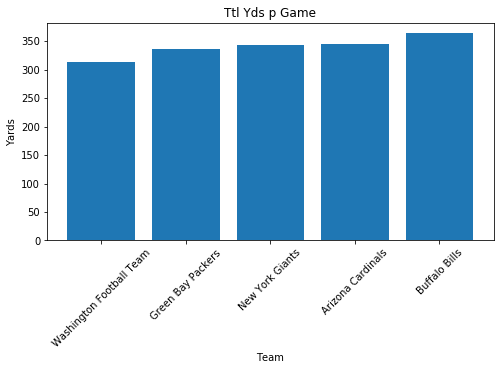

----------------------------------------
Offense

Avg Ttl_Yds: 374.63
SEA Ttl_Yds: 407.08
--------------------------------------------------
Avg Ttl_Yds: 374.63
CAR Ttl_Yds: 365.08
--------------------------------------------------
Avg Ttl_Yds: 374.63
CLE Ttl_Yds: 381.23
--------------------------------------------------
Avg Ttl_Yds: 374.63
PHI Ttl_Yds: 350.08
--------------------------------------------------
Avg Ttl_Yds: 374.63
DEN Ttl_Yds: 343.15
--------------------------------------------------


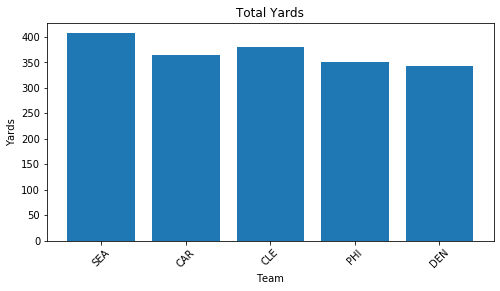

In [112]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Yds', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Yds', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Yds', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Yds', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Yds', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Yards", "Team", "Yards")

Defense

Avg Ttl_Turnovers_pG: 1.2
Washington Football Team Ttl_Turnovers_pG: 1.31
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
Green Bay Packers Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
New York Giants Ttl_Turnovers_pG: 1.54
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
Arizona Cardinals Ttl_Turnovers_pG: 1.38
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
Buffalo Bills Ttl_Turnovers_pG: 1.62
--------------------------------------------------


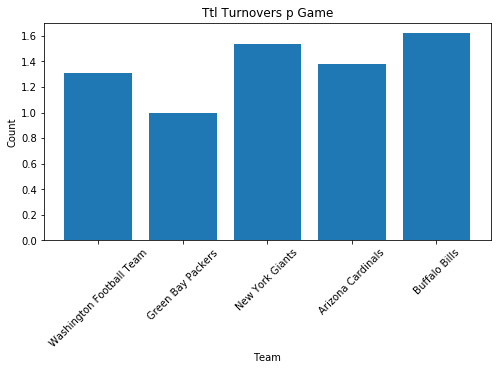

----------------------------------------
Offense

Avg Ttl_Turnovers_pG: 1.27
SEA Ttl_Turnovers_pG: 1.31
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.27
CAR Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.27
CLE Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.27
PHI Ttl_Turnovers_pG: 1.77
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.27
DEN Ttl_Turnovers_pG: 2.15
--------------------------------------------------


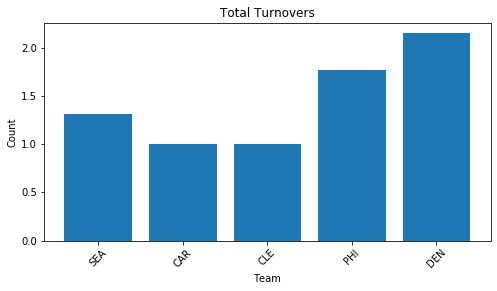

In [113]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Turnovers p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Turnovers", "Team", "Count")

Defense

Avg Ttl_TDs_pG: 2.83
Washington Football Team Ttl_TDs_pG: 2.23
--------------------------------------------------
Avg Ttl_TDs_pG: 2.83
Green Bay Packers Ttl_TDs_pG: 2.69
--------------------------------------------------
Avg Ttl_TDs_pG: 2.83
New York Giants Ttl_TDs_pG: 2.23
--------------------------------------------------
Avg Ttl_TDs_pG: 2.83
Arizona Cardinals Ttl_TDs_pG: 2.46
--------------------------------------------------
Avg Ttl_TDs_pG: 2.83
Buffalo Bills Ttl_TDs_pG: 2.85
--------------------------------------------------


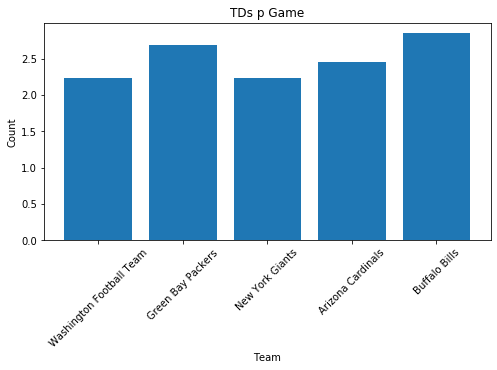

----------------------------------------
Offense

Avg TtlTDs_pG: 2.86
SEA TtlTDs_pG: 3.69
--------------------------------------------------
Avg TtlTDs_pG: 2.86
CAR TtlTDs_pG: 2.38
--------------------------------------------------
Avg TtlTDs_pG: 2.86
CLE TtlTDs_pG: 3.0
--------------------------------------------------
Avg TtlTDs_pG: 2.86
PHI TtlTDs_pG: 2.46
--------------------------------------------------
Avg TtlTDs_pG: 2.86
DEN TtlTDs_pG: 2.15
--------------------------------------------------


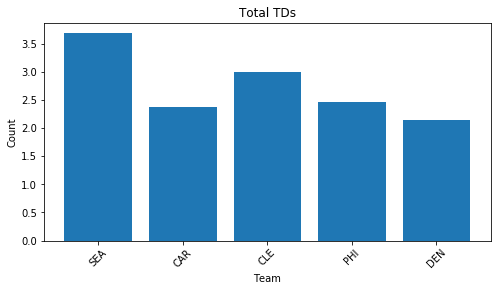

In [114]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "TDs p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'TtlTDs_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'TtlTDs_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'TtlTDs_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'TtlTDs_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'TtlTDs_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total TDs", "Team", "Count")

#### Additional Defense Stats

Avg Sacks_pG: 2.22
Washington Football Team Sacks_pG: 3.08
--------------------------------------------------
Avg Sacks_pG: 2.22
Green Bay Packers Sacks_pG: 2.69
--------------------------------------------------
Avg Sacks_pG: 2.22
New York Giants Sacks_pG: 2.54
--------------------------------------------------
Avg Sacks_pG: 2.22
Arizona Cardinals Sacks_pG: 2.85
--------------------------------------------------
Avg Sacks_pG: 2.22
Buffalo Bills Sacks_pG: 2.38
--------------------------------------------------


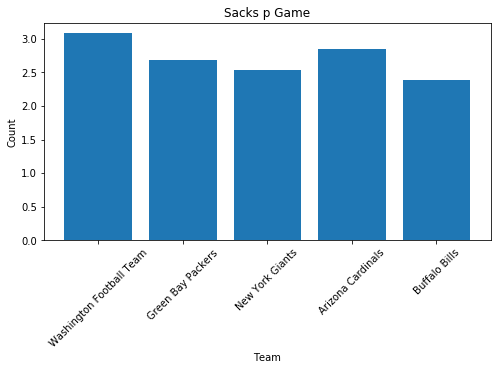

In [115]:
average, def1, _1def = print_metric_team(available_def, 'Sacks_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Sacks_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Sacks_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Sacks_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Sacks_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Sacks p Game", "Team", "Count")



## Kicking

In [116]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14
1,Jason Sanders,K,MIA,13,32,93.80,56,1-1,7-7,4-4,10-12,8-8,30,100.00,120,146.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,12.00,14.00,10.00
3,Daniel Carlson,K,LV,13,28,92.90,54,0-0,13-13,6-6,3-5,4-4,39,97.40,116,127.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00,7.00,15.00,7.00,6.00,8.00,9.00
4,Tyler Bass,K,BUF,13,31,80.60,58,1-1,6-6,6-9,8-9,4-6,40,95.00,113,129.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00,18.00,0.00,11.00,10.00,8.00
5,Ryan Succop,K,TB,13,26,92.30,50,1-1,7-7,8-8,7-8,1-2,41,92.70,110,119.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00,15.00,4.00,17.00,6.00,6.00,0.00,9.00
11,Jason Myers,K,SEA,13,18,100.00,61,0-0,2-2,5-5,9-9,2-2,46,93.50,97,110.00,9.00,5.00,4.00,9.00,3.00,0.00,12.00,8.00,12.00,12.00,9.00,12.00,4.00,11.00


In [117]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [118]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [119]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
1,Jason Sanders,K,MIA,13,32,93.80,56,1-1,7-7,4-4,10-12,8-8,30,100.00,120,146.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,12.00,14.00,10.00,1,7,4,10,8
22,Brandon McManus,K,DEN,13,24,91.70,58,0-0,4-4,2-2,8-8,8-10,24,87.50,87,111.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,7.00,11.00,8.00,9.00,5.00,6.00,2.00,0,4,2,8,8
15,Stephen Gostkowski,K,TEN,13,25,68.00,55,0-0,2-3,3-4,5-10,7-8,41,95.10,90,109.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,2.00,7.00,7.00,12.00,10.00,3.00,9.00,0,2,3,5,7
16,Matt Prater,K,DET,13,26,73.10,59,0-0,4-4,7-7,4-7,4-8,34,97.10,90,102.00,12.00,3.00,14.00,3.00,0.00,11.00,16.00,3.00,9.00,16.00,0.00,5.00,4.00,6.00,0,4,7,4,4
4,Tyler Bass,K,BUF,13,31,80.60,58,1-1,6-6,6-9,8-9,4-6,40,95.00,113,129.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00,18.00,0.00,11.00,10.00,8.00,1,6,6,8,4


In [120]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

k_columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

scale_data(scaled_k, k_columns)

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
1,Jason Sanders,K,MIA,13,1.62,0.69,0.60,0.54,0.68,1.51,2.78,1.51,0.06,1.70,2.75
3,Daniel Carlson,K,LV,13,1.23,0.66,0.49,1.12,0.55,1.41,-0.36,3.71,0.80,-0.33,0.90
4,Tyler Bass,K,BUF,13,1.52,0.24,0.71,1.19,0.43,1.34,2.78,1.15,0.80,1.12,0.90
5,Ryan Succop,K,TB,13,1.03,0.64,0.27,1.25,0.32,1.27,2.78,1.51,1.55,0.83,-0.49
11,Jason Myers,K,SEA,13,0.24,0.91,0.87,1.57,0.36,0.94,-0.36,-0.31,0.43,1.41,-0.03


In [122]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head(6)

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
1,Jason Sanders,K,MIA,13,1.62,0.69,0.60,0.54,0.68,1.51,2.78,1.51,0.06,1.70,2.75,14.46
4,Tyler Bass,K,BUF,13,1.52,0.24,0.71,1.19,0.43,1.34,2.78,1.15,0.80,1.12,0.90,12.18
5,Ryan Succop,K,TB,13,1.03,0.64,0.27,1.25,0.32,1.27,2.78,1.51,1.55,0.83,-0.49,10.96
3,Daniel Carlson,K,LV,13,1.23,0.66,0.49,1.12,0.55,1.41,-0.36,3.71,0.80,-0.33,0.90,10.19
12,Graham Gano,K,NYG,13,1.13,0.78,0.54,-0.16,0.42,0.92,-0.36,0.42,2.29,1.12,0.90,7.98
14,Mason Crosby,K,GB,13,-0.05,0.91,0.65,1.83,0.38,0.82,2.78,-0.68,0.43,0.25,0.44,7.76


In [123]:
kicker1 = 1
kicker2 = 4
kicker3 = 5
kicker4 = 12
kicker5 = 14

Week 15 Opponents:

    Miami Dolphins vs New England Patriots
    Buffalo Bills vs Denver Broncos
    Tampa Bay Buccaneers vs Arizona Cardinals
    New York Giants vs Cleveland Browns
    Green Bay Packers vs Carolina Panthers

In [124]:
kicking_opponents = ['New England Patriots', 'Denver Broncos', 'Arizona Cardinals', 'Cleveland Browns', 
                     'Carolina Panthers']


In [125]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
6,New England Patriots,13,279,779,5.70,4453,366,1612,4.40,12,394,6.90,260,11.40,2841,17,38,24,63.20,19,15,4,19,98.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,3.00,5.00,0.00,5.00,31.00,4.00,21.46,342.54,28.15,124.00,0.92,30.31,20.00,0.66,218.54,1.31,2.23,1.46,0.31,1.46,7.54,29,76,25.33
12,Arizona Cardinals,13,303,850,5.30,4478,347,1554,4.50,12,466,5.80,306,10.50,2924,20,45,24,53.30,18,10,8,37,82.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,2.00,8.00,2.00,18.00,23.31,344.46,26.69,119.54,0.92,35.85,23.54,0.66,224.92,1.54,2.46,1.38,0.62,2.85,6.31,32,79,26.33
19,Carolina Panthers,13,332,828,5.70,4737,332,1477,4.40,14,477,6.60,330,10.30,3260,23,47,29,61.70,18,5,13,19,72.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,4.00,2.00,-1.00,17.00,19.00,0.00,2.00,25.54,364.38,25.54,113.62,1.08,36.69,25.38,0.69,250.77,1.77,2.85,1.38,1.00,1.46,5.54,37,73,24.33
22,Denver Broncos,13,347,859,5.30,4572,367,1703,4.60,17,456,5.80,301,10.30,2869,16,49,24,49.00,11,8,3,36,61.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,3.00,-4.00,12.00,4.00,1.00,10.00,26.69,351.69,28.23,131.00,1.31,35.08,23.15,0.66,220.69,1.23,2.54,0.85,0.23,2.77,4.69,33,116,38.67
26,Cleveland Browns,13,368,847,5.60,4720,337,1483,4.40,16,476,6.30,309,11.20,3237,26,54,35,64.80,20,10,10,34,80.00,0.00,4.00,14.00,5.00,13.00,1.00,7.00,3.00,0.00,6.00,20.00,0.00,5.00,2.00,28.31,363.08,25.92,114.08,1.23,36.62,23.77,0.65,249.00,2.00,3.23,1.54,0.77,2.62,6.15,42,74,24.67


In [126]:
kick_def1 = 6
kick_def2 = 22
kick_def3 = 12
kick_def4 = 26
kick_def5 = 19

#### Kicking Comparison

Kickers

Avg FGM_A: 15.54
Jason Sanders FGM_A: 32
--------------------------------------------------
Avg FGM_A: 15.54
Tyler Bass FGM_A: 31
--------------------------------------------------
Avg FGM_A: 15.54
Ryan Succop FGM_A: 26
--------------------------------------------------
Avg FGM_A: 15.54
Graham Gano FGM_A: 27
--------------------------------------------------
Avg FGM_A: 15.54
Mason Crosby FGM_A: 15
--------------------------------------------------


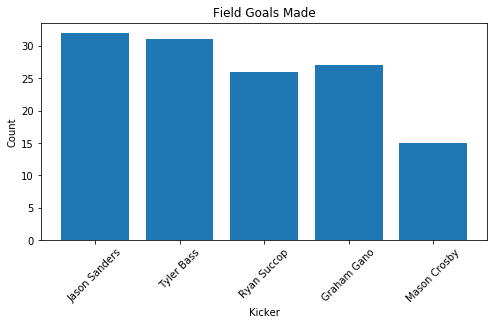

----------------------------------------
Defense

Avg Num_Field_Goals_Allowed: 27.87
New England Patriots Num_Field_Goals_Allowed: 25.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 27.87
Denver Broncos Num_Field_Goals_Allowed: 38.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 27.87
Arizona Cardinals Num_Field_Goals_Allowed: 26.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 27.87
Cleveland Browns Num_Field_Goals_Allowed: 24.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 27.87
Carolina Panthers Num_Field_Goals_Allowed: 24.33
--------------------------------------------------


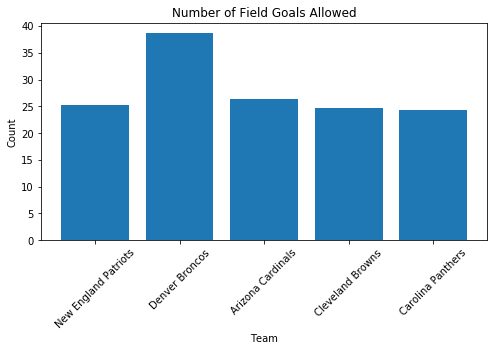

In [127]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'FGM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FGM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FGM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FGM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FGM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Kickers

Avg XPM_A: 21.54
Jason Sanders XPM_A: 30
--------------------------------------------------
Avg XPM_A: 21.54
Tyler Bass XPM_A: 40
--------------------------------------------------
Avg XPM_A: 21.54
Ryan Succop XPM_A: 41
--------------------------------------------------
Avg XPM_A: 21.54
Graham Gano XPM_A: 19
--------------------------------------------------
Avg XPM_A: 21.54
Mason Crosby XPM_A: 50
--------------------------------------------------


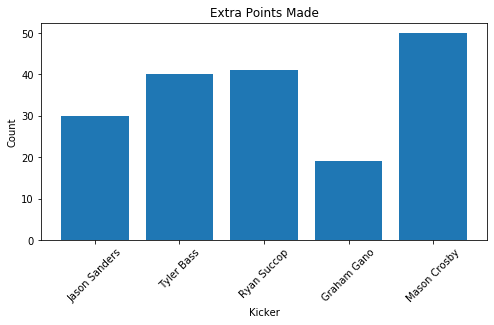

----------------------------------------
Defense

Avg Ttl_TDs: 34.6
New England Patriots Ttl_TDs: 29
--------------------------------------------------
Avg Ttl_TDs: 34.6
Denver Broncos Ttl_TDs: 33
--------------------------------------------------
Avg Ttl_TDs: 34.6
Arizona Cardinals Ttl_TDs: 32
--------------------------------------------------
Avg Ttl_TDs: 34.6
Cleveland Browns Ttl_TDs: 42
--------------------------------------------------
Avg Ttl_TDs: 34.6
Carolina Panthers Ttl_TDs: 37
--------------------------------------------------


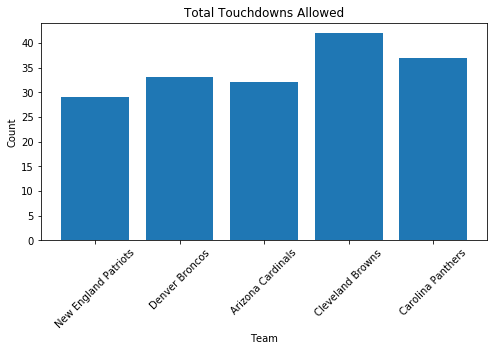

In [128]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'XPM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XPM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XPM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XPM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XPM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

#### Additional Kicker Analysis

Avg FG%: 73.56
Jason Sanders FG%: 93.8
--------------------------------------------------
Avg FG%: 73.56
Tyler Bass FG%: 80.6
--------------------------------------------------
Avg FG%: 73.56
Ryan Succop FG%: 92.3
--------------------------------------------------
Avg FG%: 73.56
Graham Gano FG%: 96.3
--------------------------------------------------
Avg FG%: 73.56
Mason Crosby FG%: 100.0
--------------------------------------------------


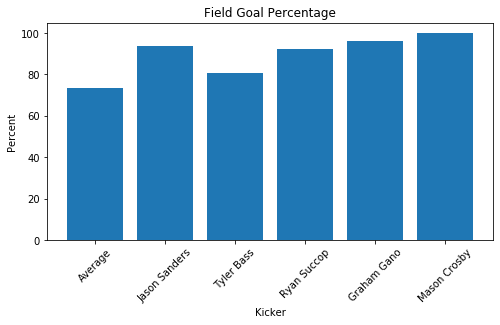

In [129]:
average, kick1, _1kick = print_metric(available_kickers, 'FG%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FG%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FG%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FG%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goal Percentage', 'Kicker', 'Percent')

Avg XP%: 86.29
Jason Sanders XP%: 100.0
--------------------------------------------------
Avg XP%: 86.29
Tyler Bass XP%: 95.0
--------------------------------------------------
Avg XP%: 86.29
Ryan Succop XP%: 92.7
--------------------------------------------------
Avg XP%: 86.29
Graham Gano XP%: 94.7
--------------------------------------------------
Avg XP%: 86.29
Mason Crosby XP%: 94.0
--------------------------------------------------


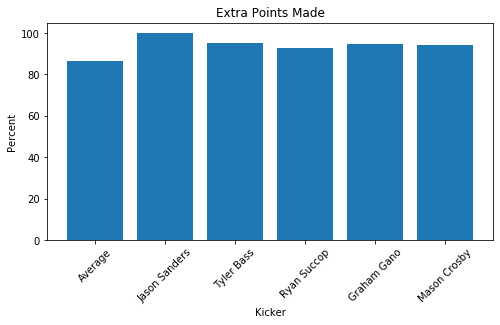

In [130]:
average, kick1, _1kick = print_metric(available_kickers, 'XP%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XP%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XP%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XP%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

#### Additional Defense Analysis

Avg RZ_Percent: 58.4
New England Patriots RZ_Percent: 63.2
--------------------------------------------------
Avg RZ_Percent: 58.4
Denver Broncos RZ_Percent: 49.0
--------------------------------------------------
Avg RZ_Percent: 58.4
Arizona Cardinals RZ_Percent: 53.3
--------------------------------------------------
Avg RZ_Percent: 58.4
Cleveland Browns RZ_Percent: 64.8
--------------------------------------------------
Avg RZ_Percent: 58.4
Carolina Panthers RZ_Percent: 61.7
--------------------------------------------------


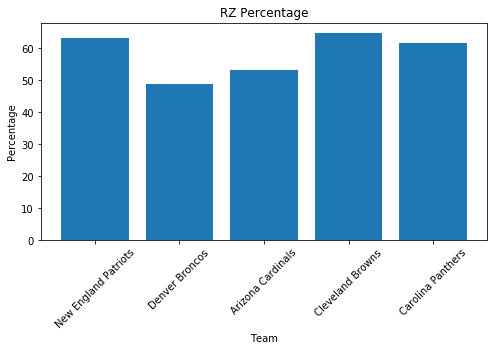

In [131]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')